In [20]:
import os
import sys
import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt

#import seaborn as sns
#sns.set_style('darkgrid')
sys.path.append('/astrodata/romain/sde_GA/geneticgrbs_v2/lc_pulse_avalanche/')
from statistical_test import *
    
%matplotlib inline
%config InlineBackend.figure_format='retina' # very useful command for high-res images

# SEED=42
# np.random.seed(SEED)
# set the username for the path of the files:
#user='external_user'
#user='LB'
#user='AF'
#user='MM'
user='romano'
#user='bach'
#user='gravity'
#user='external_user'
if user=='bach':
    # library paths
    sys.path.append('/home/bazzanini/PYTHON/genetic/lc_pulse_avalanche/statistical_test')
    sys.path.append('/home/bazzanini/PYTHON/genetic/lc_pulse_avalanche/lc_pulse_avalanche')
    # real data
    batse_path = '/astrodata/guidorzi/CGRO_BATSE/'
    swift_path = '/astrodata/guidorzi/Swift_BAT/'
    sax_path   = '/astrodata/guidorzi/BeppoSAX_GRBM/'
    # simulations
    batse_sim_path     = ''
    swift_sim_path     = ''
    beppo_sax_sim_path = ''
    # mepsa
    mepsa_path      = ''
    ex_pattern_path = ''
elif user=='gravity':
    # library paths
    sys.path.append('/home/bazzanini/PYTHON/genetic3/statistical_test')
    sys.path.append('/home/bazzanini/PYTHON/genetic3/lc_pulse_avalanche')
    # real data
    batse_path = '/astrodata/guidorzi/CGRO_BATSE/'
    swift_path = '/astrodata/guidorzi/Swift_BAT/'
    sax_path   = '/astrodata/guidorzi/BeppoSAX_GRBM/'
    # simulations
elif user=='external_user':
    # real data
    batse_path = ''
    swift_path = ''
    sax_path   = ''
    fermi_path = ''
    # simulations
    batse_sim_path     = '../simulations/batse-v37/'
    swift_sim_path     = '../simulations/swift-v36/'
    beppo_sax_sim_path = '../simulations/sax/'
    fermi_sim_path     = ''
    # MEPSA
    mepsa_path      = ''
    ex_pattern_path = ''
    # MEPSA on BATSE
    batse_mepsa_res_path = ''
    # MEPSA on Swift
    swift_mepsa_res_path = ''
    # The following require LaTeX installed
    # rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
    # rc('text', usetex=True)
elif user=='LB':
    # real data
    batse_path = '/Users/lorenzo/Documents/UNIVERSITA/Astrophysics/PYTHON/DATA/CGRO_BATSE/'
    swift_path = '/Users/lorenzo/Documents/UNIVERSITA/Astrophysics/PYTHON/DATA/Swift_BAT/'
    sax_path   = '/Users/lorenzo/Documents/UNIVERSITA/Astrophysics/PYTHON/DATA/BeppoSAX_GRBM/'
    fermi_path = '' #To be added
    # simulations
    batse_sim_path     = '/Users/lorenzo/Documents/UNIVERSITA/Astrophysics/PYTHON/GRBs/lc_pulse_avalanche/simulations/batse/'
    swift_sim_path     = '/Users/lorenzo/Documents/UNIVERSITA/Astrophysics/PYTHON/GRBs/lc_pulse_avalanche/simulations/swift/'
    beppo_sax_sim_path = '/Users/lorenzo/Documents/UNIVERSITA/Astrophysics/PYTHON/GRBs/lc_pulse_avalanche/simulations/sax/'
    fermi_sim_path     = '' #To be added
    # MEPSA
    mepsa_path      = '/Users/lorenzo/Documents/UNIVERSITA/Astrophysics/PYTHON/GRBs/lc_pulse_avalanche/pyMEPSA/mepsa.so'
    ex_pattern_path = '/Users/lorenzo/Documents/UNIVERSITA/Astrophysics/PYTHON/GRBs/lc_pulse_avalanche/pyMEPSA/excess_pattern_MEPSA_v0.dat'
    # MEPSA on BATSE
    batse_mepsa_res_path = '/Users/lorenzo/Documents/UNIVERSITA/Astrophysics/PYTHON/DATA/CGRO_BATSE/PEAKS_ALL/'
    # MEPSA on Swift
    swift_mepsa_res_path = '/Users/lorenzo/Documents/UNIVERSITA/Astrophysics/PYTHON/DATA/Swift_BAT/PEAKS_ALL/'
    # The following require LaTeX installed
    rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
    rc('text', usetex=True)
elif user=='AF':
    # real data
    batse_path            = 'D:/grb_to_test/CGRO_BATSE/'
    batse_mepsa_res_path  = 'D:/grb_to_test/CGRO_BATSE/PEAKS_ALL/'
    swift_path            = 'D:/grb_to_test/Swift_BAT/'
    sax_path              = 'D:/grb_to_test/BeppoSAX_GRBM/'
    fermi_path            = 'D:/grb_to_test/FERMI_GBM/'
    # simulations
    batse_sim_path        = 'D:/grb_to_test/simulations/batse/5m_11par_3/'
    swift_sim_path        = 'D:/grb_to_test/simulations/swift/v1/'
    beppo_sax_sim_path_hr = 'D:/grb_to_test/simulations/sax_hr/'
    beppo_sax_sim_path_lr = 'D:/grb_to_test/simulations/sax_lr/'
    fermi_sim_path        = 'D:/grb_to_test/simulations/fermi/paper/'
    # mepsa
    mepsa_path            = 'C:/Users/Lisa/Documents/GitHub/lc_pulse_avalanche/pyMEPSA/mepsa.so'
    ex_pattern_path       = 'C:/Users/Lisa/Documents/GitHub/lc_pulse_avalanche/pyMEPSA/excess_pattern_MEPSA_v0.dat'
elif user=='MM':
    # real data
    # batse_path            = '/home/manuele/Documents/university/grbs/geneticgrbs_data/CGRO_BATSE/'
    # swift_path            = '/home/manuele/Documents/university/grbs/geneticgrbs_data/Swift_BAT/'
    # sax_path              = '/home/manuele/Documents/university/grbs/geneticgrbs_data/BeppoSAX_GRBM/'
    batse_path            = '/astrodata/guidorzi/CGRO_BATSE/'
    swift_path            = '/astrodata/guidorzi/Swift_BAT/'
    sax_path              = '/astrodata/guidorzi/BeppoSAX_GRBM/'
    fermi_path            = '/astrodata/romain/GBM_LC_repository/data/'
    # simulations
    # batse_sim_path        = '/home/manuele/Documents/university/grbs/geneticgrbs_simulations/batse/'
    # swift_sim_path        = '/home/manuele/Documents/university/grbs/geneticgrbs_simulations/swift/'
    # beppo_sax_sim_path_hr = '/home/manuele/Documents/university/grbs/geneticgrbs_simulations/sax/'
    batse_sim_path        = '/home/maistrello/geneticgrbs_simulations/batse/'
    swift_sim_path        = '/home/maistrello/geneticgrbs_simulations/swift/'
    beppo_sax_sim_path_hr = '/home/maistrello/geneticgrbs_simulations/sax/'
    fermi_sim_path        = '/home/maistrello/geneticgrbs_simulations/fermi/'
    # mepsa
    # mepsa_path            = '/home/manuele/Documents/university/grbs/geneticgrbs/pyMEPSA/mepsa.so'
    # ex_pattern_path       = '/home/manuele/Documents/university/grbs/geneticgrbs/pyMEPSA/excess_pattern_MEPSA_v0.dat'
elif user == 'romano':
     # real data
    # batse_path            = '/home/manuele/Documents/university/grbs/geneticgrbs_data/CGRO_BATSE/'
    # swift_path            = '/home/manuele/Documents/university/grbs/geneticgrbs_data/Swift_BAT/'
    # sax_path              = '/home/manuele/Documents/university/grbs/geneticgrbs_data/BeppoSAX_GRBM/'
    batse_path            = '/astrodata/guidorzi/CGRO_BATSE/'
    swift_path            = '/astrodata/guidorzi/Swift_BAT/'
    sax_path              = '/astrodata/guidorzi/BeppoSAX_GRBM/'
    fermi_path            = '/astrodata/romain/GBM_LC_repository/data/'
    # simulations
    # batse_sim_path        = '/home/manuele/Documents/university/grbs/geneticgrbs_simulations/batse/'
    # swift_sim_path        = '/home/manuele/Documents/university/grbs/geneticgrbs_simulations/swift/'
    # beppo_sax_sim_path_hr = '/home/manuele/Documents/university/grbs/geneticgrbs_simulations/sax/'
    batse_sim_path        = '/astrodata/romain/GA_SIMULATIONS/geneticgrbs_simulations_new_formulation_x0/batse/'
    swift_sim_path        = '/astrodata/romain/geneticgrbs_simulations_new_formulation/swift/'
    beppo_sax_sim_path_hr = '/astrodata/romain/geneticgrbs_simulations_new_formulation/sax/'
    fermi_sim_path        = '/astrodata/romain/geneticgrbs_simulations_new_formulation/fermi/'
    # mepsa
    # mepsa_path            = '/home/manuele/Documents/university/grbs/geneticgrbs/pyMEPSA/mepsa.so'
    # ex_pattern_path       = '/home/manuele/Documents/university/grbs/geneticgrbs/pyMEPSA/excess_pattern_MEPSA_v0.dat'
    savefolder            = '/astrodata/romain/sde_GA/geneticgrbs_v2/genetic_algorithm/result_sde_new_sde_formulation_v4/'
else:
    raise ValueError('Assign to the variable "user" a correct username!')

# LOAD DATA

In [21]:
t_i       = 0   # [s]
t_f       = 150 # [s]
t_f_sax   = 50  # [s]

#------------------------------------------------------------------------------#
# BATSE
#------------------------------------------------------------------------------#
bin_time_batse     = instr_batse['res'] # temporal resolution (bins) for BATSE [s]
test_times_batse   = np.linspace(t_i, t_f, int((t_f-t_i)/bin_time_batse))
sn_threshold_batse = instr_batse['sn_threshold']
sn_threshold_sup   = instr_batse['sn_threshold_sup']
t90_threshold      = instr_batse['t90_threshold'] 
t90_frac           = 15
#h_opt_batse        = 0.09

## Load REAL Data

#### BATSE 

In [22]:
### Load the BATSE GRBs

# load all data
grb_list_batse = load_lc_batse(path=batse_path) 
# apply constraints
grb_list_batse, sn_lev_batse = apply_constraints(grb_list=grb_list_batse, 
                                                 bin_time=bin_time_batse, 
                                                 t90_threshold=t90_threshold, 
                                                 t90_frac=t90_frac,
                                                 sn_threshold=sn_threshold_batse, 
                                                 sn_threshold_sup=sn_threshold_sup,
                                                 sn_distr=True,
                                                 t_f=t_f,
                                                 zero_padding=True)

if False:
    fig = plt.figure()
    ax = fig.add_subplot()
    sn_lev_batse_ = np.array([ s2n for s2n in sn_lev_batse.values()])
    ax.hist(sn_lev_batse_, bins=20)
    ax.grid(which='both')
    ax.set_yscale('log')
    ax.set_title('S2N distr. of *BATSE* GRBs that passed the constraints')
    ax.set_xlabel('S/N level')
    ax.set_ylabel('Number of GRBs')
    ax.set_xlim(0, np.max(sn_lev_batse_))
    print('Average S/N', np.mean(sn_lev_batse_))
    plt.show()

if False:
    # Select names for MEPSA (only the GRBs that satisfy the constraints)
    with open('./grb_for_mepsa_BATSE.txt', 'w') as output:
        for i in range(len(grb_list_batse)):
            name = grb_list_batse[i].name
            output.write(name + '\n')

Loading BATSE data...
Total number of _long_ GRBs in BATSE catalogue:  1457
GRBs in the catalogue which are NOT present in the data folder:  0
Loaded GRBs:  1457
Total number of input GRBs:  1457
GRBs with negative duration:  0
GRBs that satisfy the constraints:  1155


## Load SIMULATED Data 

We load the simulated GRBs produced with the avalanche; the files are: `lcXXX.txt`, one file for each simulated GRB; the columns in the files are: `times`, `counts`, `errs`, `t90`.

#### BATSE:

In [23]:
################################################################################
# Load the simulated BATSE GRBs
################################################################################

# load all data
grb_list_sim_batse = load_lc_sim(path=batse_sim_path)
# apply constraints
grb_list_sim_batse = apply_constraints(grb_list=grb_list_sim_batse, 
                                       bin_time=bin_time_batse, 
                                       t90_threshold=t90_threshold, 
                                       t90_frac=t90_frac,
                                       sn_threshold=sn_threshold_batse, 
                                       sn_threshold_sup=sn_threshold_sup,
                                       t_f=t_f,
                                       zero_padding=True)

/astrodata/romain/GA_SIMULATIONS/geneticgrbs_simulations_new_formulation_x0/batse/lc0.txt
/astrodata/romain/GA_SIMULATIONS/geneticgrbs_simulations_new_formulation_x0/batse/lc1.txt
/astrodata/romain/GA_SIMULATIONS/geneticgrbs_simulations_new_formulation_x0/batse/lc2.txt
/astrodata/romain/GA_SIMULATIONS/geneticgrbs_simulations_new_formulation_x0/batse/lc3.txt
/astrodata/romain/GA_SIMULATIONS/geneticgrbs_simulations_new_formulation_x0/batse/lc4.txt
/astrodata/romain/GA_SIMULATIONS/geneticgrbs_simulations_new_formulation_x0/batse/lc5.txt
/astrodata/romain/GA_SIMULATIONS/geneticgrbs_simulations_new_formulation_x0/batse/lc6.txt
/astrodata/romain/GA_SIMULATIONS/geneticgrbs_simulations_new_formulation_x0/batse/lc7.txt
/astrodata/romain/GA_SIMULATIONS/geneticgrbs_simulations_new_formulation_x0/batse/lc8.txt
/astrodata/romain/GA_SIMULATIONS/geneticgrbs_simulations_new_formulation_x0/batse/lc9.txt
/astrodata/romain/GA_SIMULATIONS/geneticgrbs_simulations_new_formulation_x0/batse/lc10.txt
/astrodat

# Test 1&2: Average Peak-Aligned Profiles

### BATSE

In [24]:
averaged_fluxes_batse, \
averaged_fluxes_cube_batse, \
averaged_fluxes_rms_batse, \
averaged_fluxes_cube_rms_batse = compute_average_quantities(grb_list=grb_list_batse, 
                                                            t_f=t_f, 
                                                            bin_time=bin_time_batse,
                                                            filter=True,
                                                            compute_rms=True)

averaged_fluxes_sim_batse, \
averaged_fluxes_cube_sim_batse, \
averaged_fluxes_rms_sim_batse, \
averaged_fluxes_cube_rms_sim_batse = compute_average_quantities(grb_list=grb_list_sim_batse, 
                                                                t_f=t_f, 
                                                                bin_time=bin_time_batse,
                                                                filter=True,
                                                                compute_rms=True)

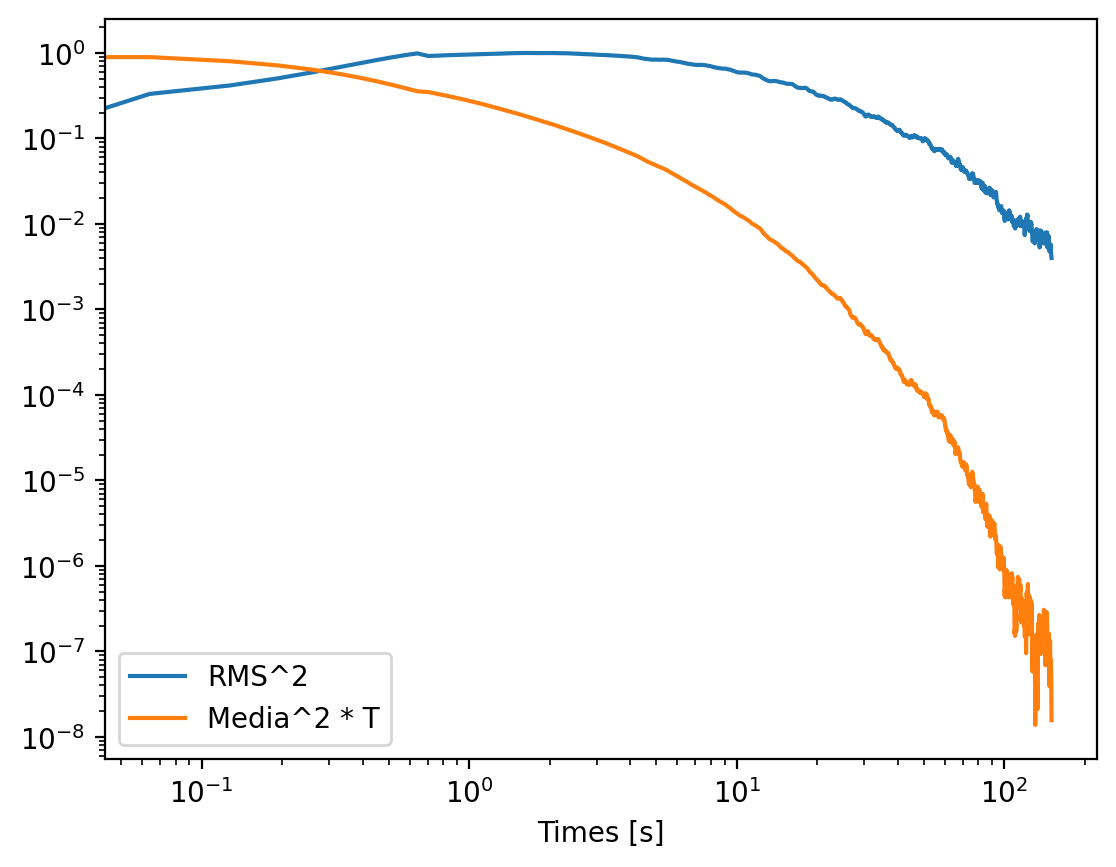

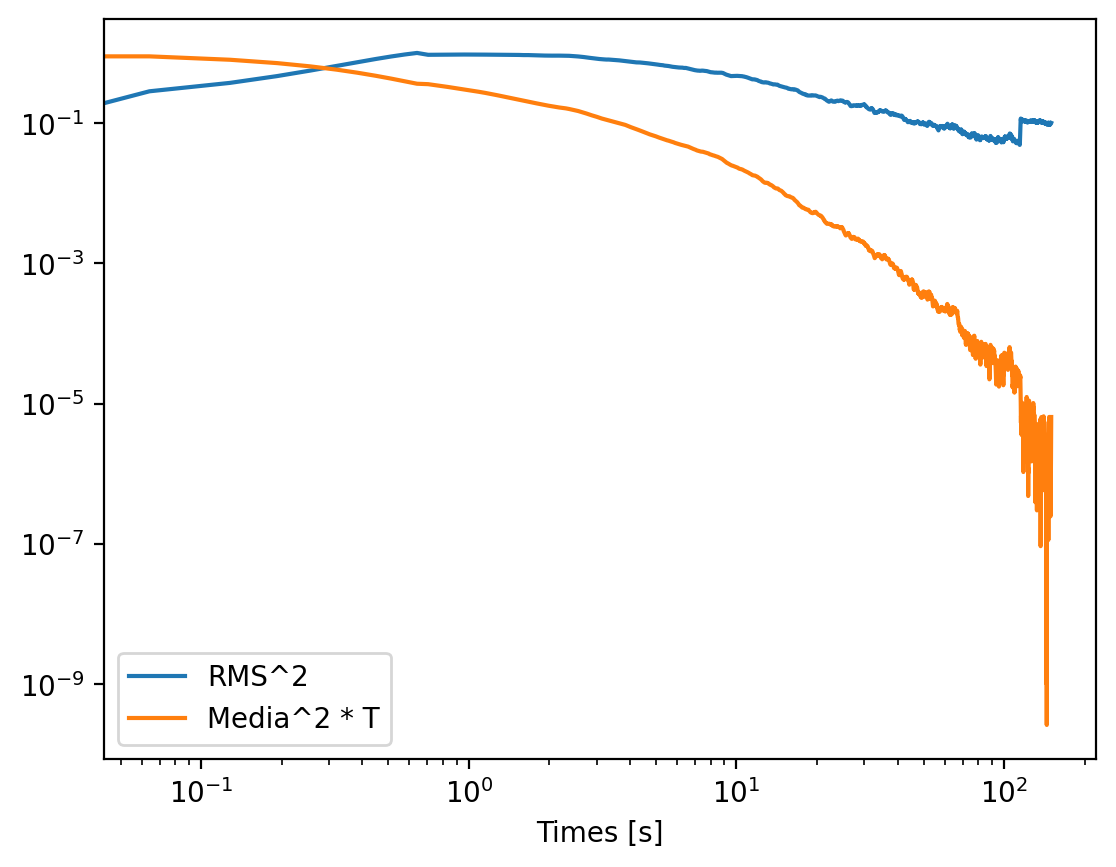

In [25]:
y1 = averaged_fluxes_rms_sim_batse**2
y2 = averaged_fluxes_sim_batse**2 * bin_time_batse
plt.plot(test_times_batse, y1/max(y1), label = 'RMS^2')
plt.plot(test_times_batse, y2/max(y2), label = 'Media^2 * T')
plt.xlabel('Times [s]')
plt.legend()
plt.yscale('log')
plt.xscale('log')

plt.figure()
y3 = averaged_fluxes_rms_batse**2
y4 = averaged_fluxes_batse**2 * bin_time_batse
plt.plot(test_times_batse, y3/max(y3), label = 'RMS^2')
plt.plot(test_times_batse, y4/max(y4), label = 'Media^2 * T')
plt.xlabel('Times [s]')
plt.legend()
plt.yscale('log')
plt.xscale('log')

# Test 3: Autocorrelation

### BATSE

In [26]:
# N_lim=np.min( [np.max(len(grb_list_sim_batse  )), 
#                np.max(len(grb_list_batse))] )
# #print(N_lim)
# assert len(grb_list_sim_batse) >= N_lim
# assert len(grb_list_batse)     >= N_lim

steps_sim_batse, \
acf_sim_batse, \
acf_rms_sim_batse = compute_autocorrelation(grb_list=grb_list_sim_batse,
                                            N_lim=len(grb_list_sim_batse),
                                            t_max=t_f,
                                            bin_time=bin_time_batse,
                                            mode='scipy',
                                            compute_rms=True)

steps_batse, \
acf_batse, \
acf_rms_batse = compute_autocorrelation(grb_list=grb_list_batse,
                                        N_lim=len(grb_list_batse),
                                        t_max=t_f,
                                        bin_time=bin_time_batse,
                                        mode='link93',
                                        compute_rms=True)  

# Test 4: Duration
Duration of the GRB measured at a level of 20% of the peak, as in [Stern et al., 1996](https://iopscience.iop.org/article/10.1086/310267). Before computing the duration, we filter the signal in order to smooth it.

### BATSE

In [27]:
#duration_batse       = [ evaluateDuration20(times=grb.times, 
#                                            counts=grb.counts,
#                                            filter=True,
#                                            t90=grb.t90,
#                                            t90_frac=t90_frac,
#                                            bin_time=bin_time_batse)[0] for grb in grb_list_batse ]
#
#duration_sim_batse   = [ evaluateDuration20(times=grb.times, 
#                                            counts=grb.counts,
#                                            filter=True,
#                                            t90=grb.t90,
#                                            t90_frac=t90_frac,
#                                            bin_time=bin_time_batse)[0] for grb in grb_list_sim_batse   ]

duration_batse     = [ grb.t20 for grb in grb_list_batse ]
duration_sim_batse = [ grb.t20 for grb in grb_list_sim_batse ]

dur_distr_batse     = compute_kde_log_duration(duration_batse)
dur_distr_sim_batse = compute_kde_log_duration(duration_sim_batse)

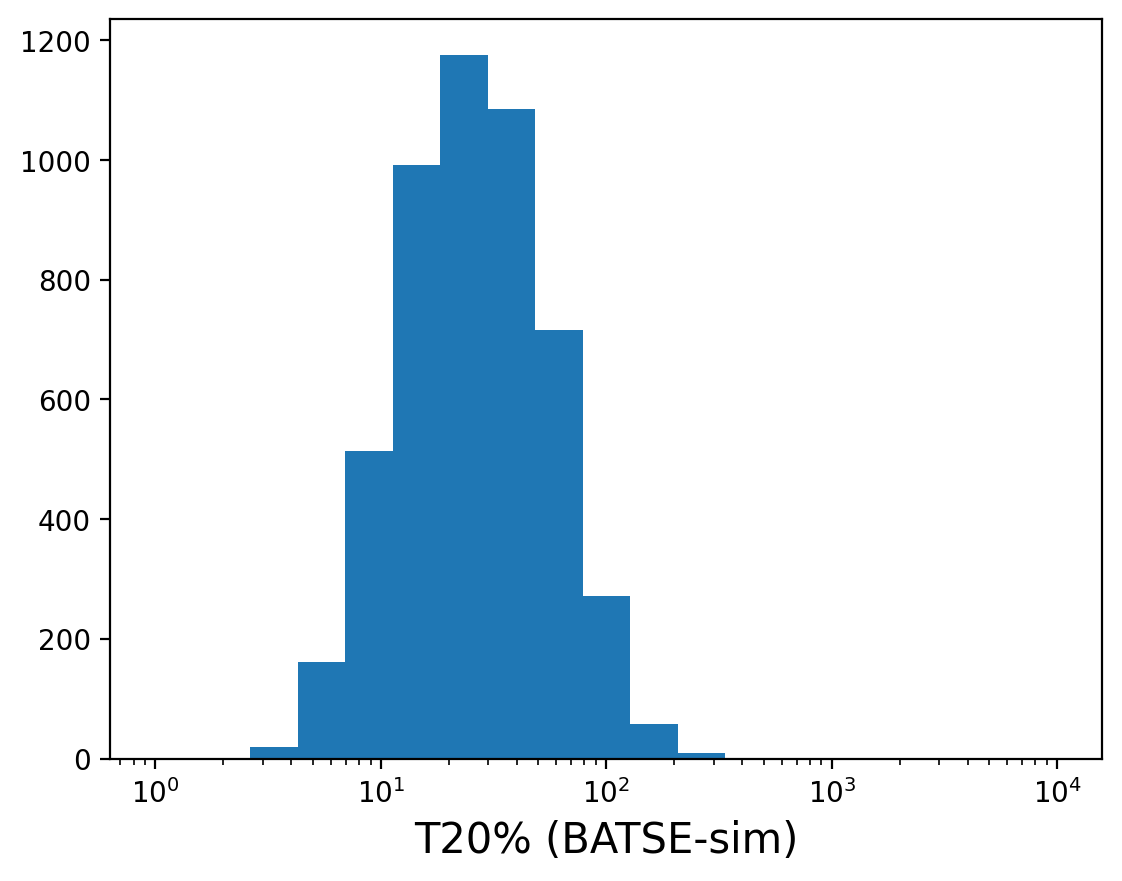

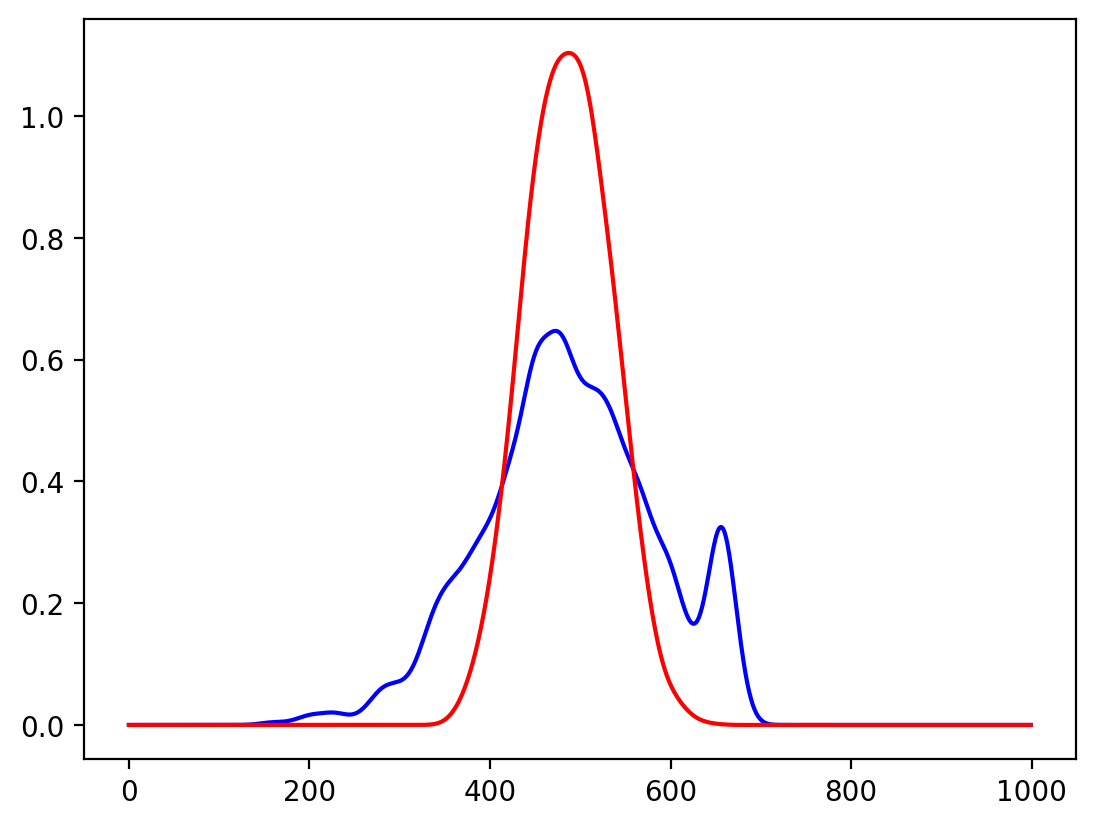

In [28]:
duration_sim_batse = [ grb.t20 for grb in grb_list_sim_batse ]

bins = np.logspace(0, 4, 20)
plt.hist(duration_sim_batse, bins=bins)
plt.xscale('log')
plt.xlabel('T20% (BATSE-sim)', size=15)
plt.show()

################################################################################

plt.plot(dur_distr_batse,     c='b')
plt.plot(dur_distr_sim_batse, c='r')
plt.show()

# Test 6: S/N distribution


### BATSE

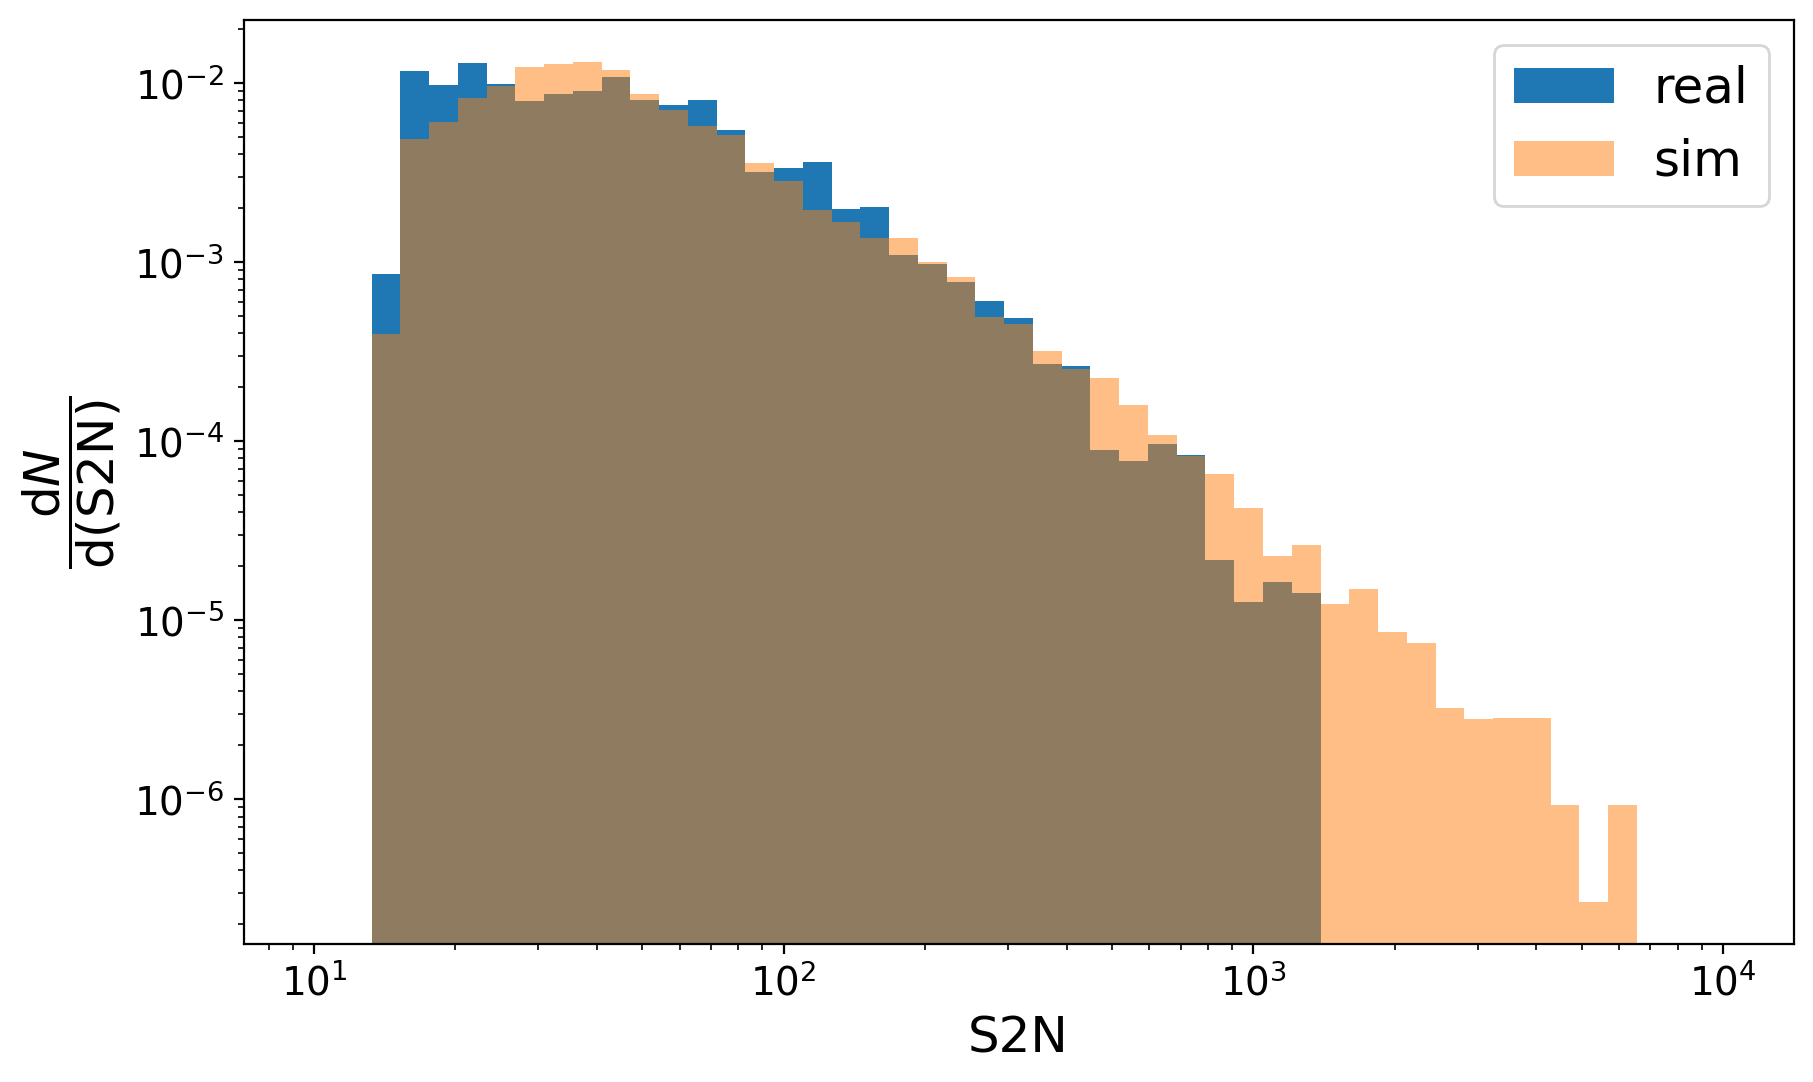

In [29]:
batse_real_SNlist = np.array([evaluateGRB_SN(grb.times, grb.counts, grb.errs, grb.t90, t90_frac, bin_time_batse, filter=True)[0] for grb in grb_list_batse])
batse_sim_SNlist  = np.array([evaluateGRB_SN(grb.times, grb.counts, grb.errs, grb.t90, t90_frac, bin_time_batse, filter=True)[0] for grb in grb_list_sim_batse])

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
bins = np.logspace(1, 4, 50)
n, bins, patches = ax.hist(batse_real_SNlist, bins=bins, alpha=1.0, density=True, label='real')
_,    _,      _, = ax.hist(batse_sim_SNlist,  bins=bins, alpha=0.5, density=True, label='sim') 
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel(r'S2N', size=18)
ax.set_ylabel(r'$\dfrac{\mathrm{d}N}{\mathrm{d(S2N)}}$', size=18)
ax.legend(fontsize=18)
ax.loglog()
# ax.grid()
plt.show()
#plt.savefig(savefolder+'SN_distr_sim_vs_real_BATSE.png')

In [30]:
print('AD p-value: ', two_pop_test(batse_real_SNlist, batse_sim_SNlist, mode='AD'))
print('KS p-value: ', two_pop_test(batse_real_SNlist, batse_sim_SNlist, mode='KS'))

AD p-value:  0.001
KS p-value:  0.0065703221813293525


/astrodata/romain/sde_GA/geneticgrbs_v2/lc_pulse_avalanche/statistical_test.py:1246: UserWarning: p-value floored: true value smaller than 0.001. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  res_ad = anderson_ksamp([distr_1,distr_2])


5000 5000


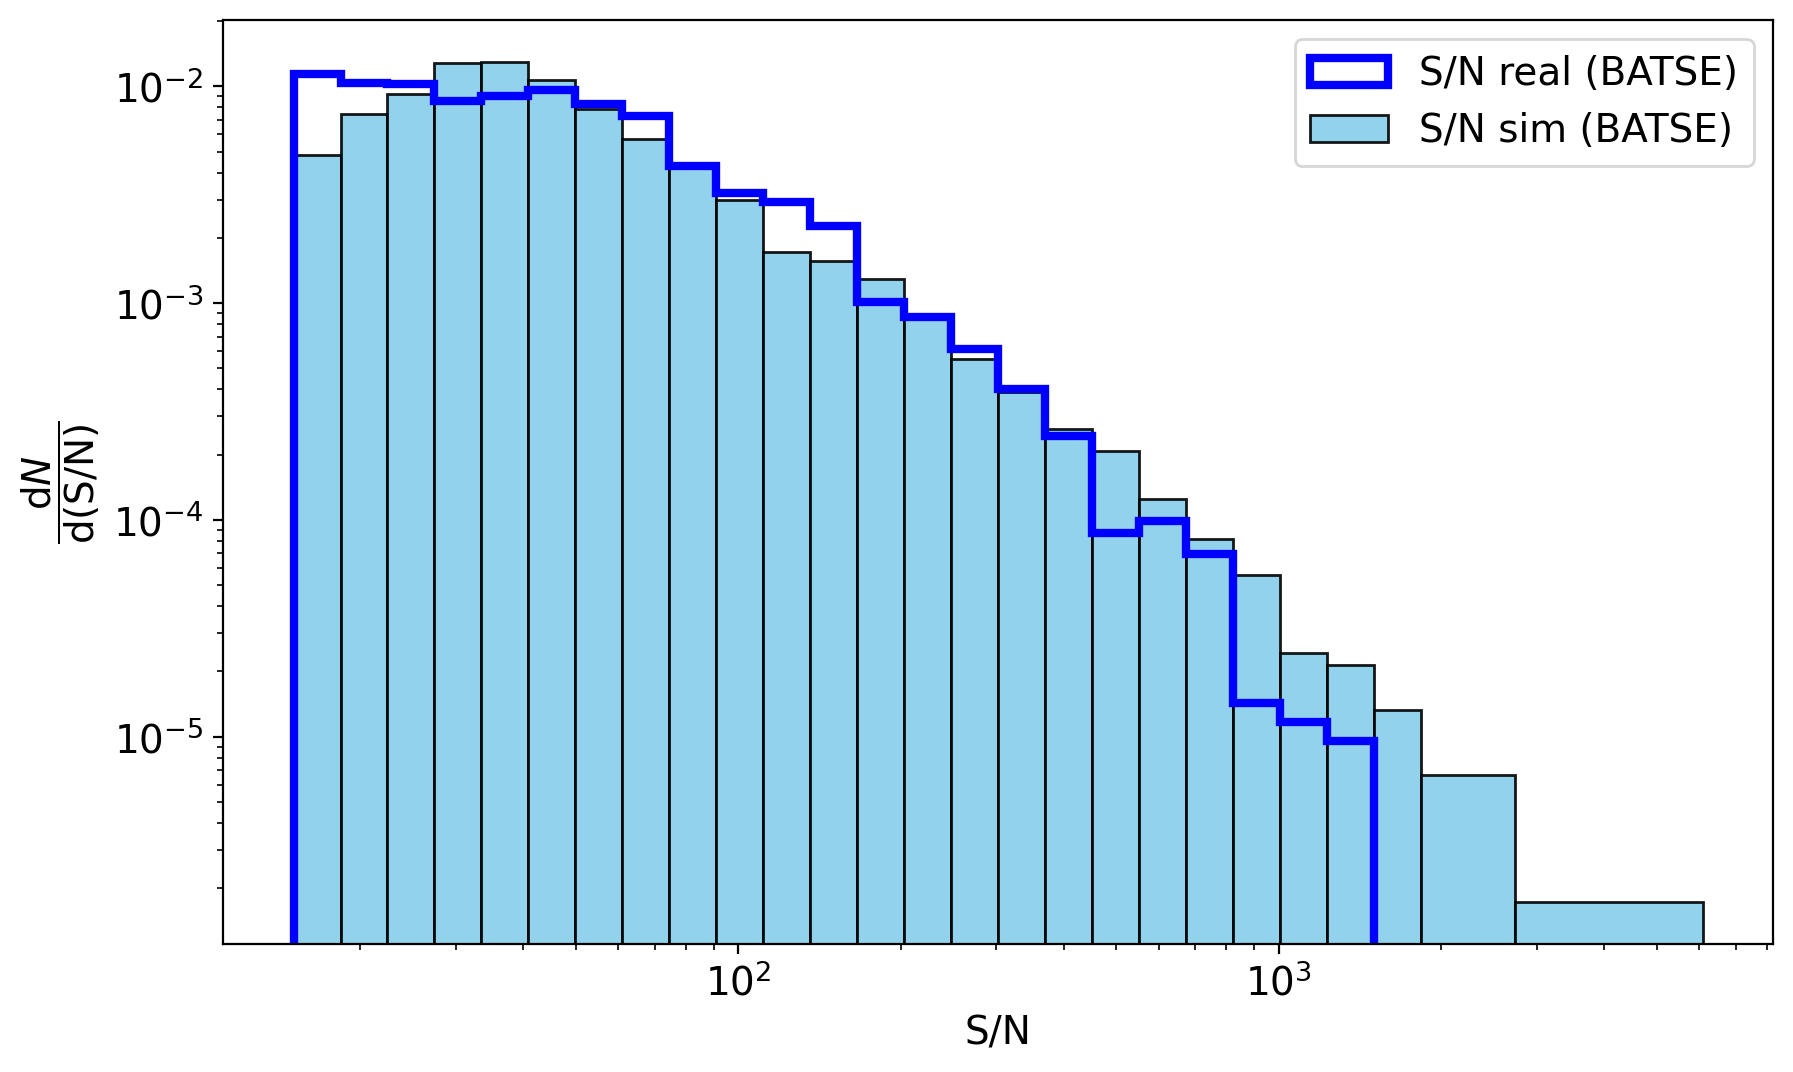

In [31]:
#from statistical_test import *

def rebin_histogram(bin_edges, data, n_min=20):
    """
    Rebins the histogram so that each bin contains at least 20 data points.
    We start with a predefined set of bins (e.g., we decide the have nbins=15
    bins, so that bin_edges will be: 
        bin_edges = np.linspace(min(data), max(data), nbins+1)
    Every time in a predefined bin there are less than n_min=20 counts, we 
    extend the right endpoint of the current bin towards the next bin. We do
    this iteratively until the current (enlarged) bin has >= n_min=20 points.
    The last points on the right that do not form a complete bin of n_min is
    included in the bin immediately before (which then becomes the last one).
    Args:
        - bin_edges: A list of the bin endpoints;
        - data: The data to be rebinned;
    Returns:
        - new_bin_edges: A list of the new bin edges;
        - new_bin_counts: A list of the new bin counts;
    """
  
    data      = np.array(data)
    bin_edges = np.array(bin_edges)
    new_bin_counts = []
    new_bin_edges  = []
    new_bin_edges.append(bin_edges[0])
    for i in range(len(bin_edges)-1):
        bin_count = len( data[(new_bin_edges[-1]<=data) & (data<bin_edges[i+1])] )
        if (bin_count >= n_min):
            new_bin_edges.append(bin_edges[i+1])
            new_bin_counts.append(bin_count)

    if (np.sum(new_bin_counts)!=len(data)):
        # if the last data did not form a bin with len>20, 
        # then we incorporate in the last complete (n>20) bin
        new_bin_counts[-1] += len(data[data>=new_bin_edges[-1]])
        new_bin_edges[-1]   = bin_edges[-1]
    new_bin_counts = np.array(new_bin_counts).astype('int')
    print(np.sum(new_bin_counts),len(data))
    #assert np.sum(new_bin_counts) == len(data), "The number of counts in the rebinned histogram is different from the initial one!" 
    
    return new_bin_edges, new_bin_counts
nbins     = 30
binmin    = np.min(batse_sim_SNlist)
binmax    = np.max(batse_sim_SNlist)
bin_edges = np.logspace(np.log10(binmin), np.log10(binmax), nbins+1)
#bin_edges= np.linspace(0, mepsamax, nbins+1)

#------------------------------------------------------------------------------#

new_bins, new_counts = rebin_histogram(bin_edges=bin_edges,
                                       data=batse_sim_SNlist,
                                       n_min=20)
num_bins      = len(new_bins)-1
sn_counts_sim = new_counts
sn_bins_sim   = new_bins
bin_sizes     = np.diff(new_bins)

#------------------------------------------------------------------------------#

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
new_bins[-1] = np.max([np.max(batse_sim_SNlist), np.max(batse_real_SNlist)])
################################################################################
# Bar plot
################################################################################
x_bar      = new_bins[:-1]
height_bar = new_counts/(sum(new_counts)*np.diff(new_bins)) # Prob. density
width_bar  = np.diff(new_bins)
ax.bar(x=x_bar, height=height_bar, width=width_bar, align='edge', alpha=0.9, 
       ec='black', fc='skyblue', label=r'S/N sim (BATSE)')
################################################################################
# Hist
################################################################################
sn_real_counts_sim, _, _ = ax.hist(batse_real_SNlist, bins=new_bins, color='b', 
                                   density=True, histtype='step', linewidth=3,
                                   label=r'S/N real (BATSE)',) 
################################################################################
ax.set_xlabel(r'S/N', size=14)
ax.set_ylabel(r'$\dfrac{\mathrm{d}N}{\mathrm{d(S/N)}}$', size=14)
ax.set_xticks(new_bins[::3])
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
# ax.grid(which='both')
ax.loglog()
ax.legend(fontsize=14)
#plt.savefig(savefolder+'/s2n_distr_batse.pdf', format='pdf')
plt.show()

# 6. LOSS

### BATSE

In [32]:
#test_pulse_distr = True
test_pulse_distr = False
if ~test_pulse_distr:
    mepsa_batse=None
    mepsa_like_sim=None

l2_loss_batse, l2_loss_fluxes_batse, l2_loss_fluxes_cube_batse, l2_loss_acf_batse, l2_loss_duration_batse, l_sn_distr_batse = \
    compute_loss(averaged_fluxes=averaged_fluxes_batse,           averaged_fluxes_sim=averaged_fluxes_sim_batse,
                 averaged_fluxes_cube=averaged_fluxes_cube_batse, averaged_fluxes_cube_sim=averaged_fluxes_cube_sim_batse,
                 acf=acf_batse,                                   acf_sim=acf_sim_batse,
                 duration=dur_distr_batse,                        duration_sim=dur_distr_sim_batse, 
                 n_of_pulses=mepsa_batse,                         n_of_pulses_sim=mepsa_like_sim,   
                 sn_distrib_real=batse_real_SNlist,               sn_distrib_sim=batse_sim_SNlist, 
                 test_sn_distr=True,  
                 return_individual_loss=True,
                 test_pulse_distr=test_pulse_distr)

# if test_pulse_distr:
#     nbin=20
#     # Perform the AD 2-populations compatibility test between:
#     # - la distribuzione del numero di impulsi calcolata da MEPSA (su dati BATSE)
#     # - la distribuzione del numero di impulsi calcolato con il nostro codice (sulla simulazione corrente)
#     n_mepsa_real, bins = np.histogram(n_of_pulses,     bins=nbin, density=True)
#     n_peaks_sim,     _ = np.histogram(n_of_pulses_sim, bins=nbin, density=True)
#     p_AD               = AD_2pop_test(distr_1=n_mepsa_real,
#                                       distr_2=n_peaks_sim)
#     l_AD               = loss_AD(p_AD=p_AD)
#     print('p-value of the AD-test: ', p_AD)

print('Total loss for BATSE:', l2_loss_batse)
print('a. loss <F/F_P>     for BATSE:', l2_loss_fluxes_batse)
print('b. loss <(F/F_P)^3> for BATSE:', l2_loss_fluxes_cube_batse)
print('c. loss <ACF>       for BATSE:', l2_loss_acf_batse)
print('d. loss T_20%-distr for BATSE:', l2_loss_duration_batse)
print('e. loss S/N-distr   for BATSE:', l_sn_distr_batse)

Total loss for BATSE: 2.1704726778545775
a. loss <F/F_P>     for BATSE: 0.6082050446396898
b. loss <(F/F_P)^3> for BATSE: 0.45452898107462897
c. loss <ACF>       for BATSE: 1.577691774962907
d. loss T_20%-distr for BATSE: 5.029524254676428
e. loss S/N-distr   for BATSE: 3.182413333919235


# 7. PLOTS

- $p$-value for KS test on the duration times distribution: #TODO
- $p$-value for AD test on the duration times distribution: #TODO

## BATSE

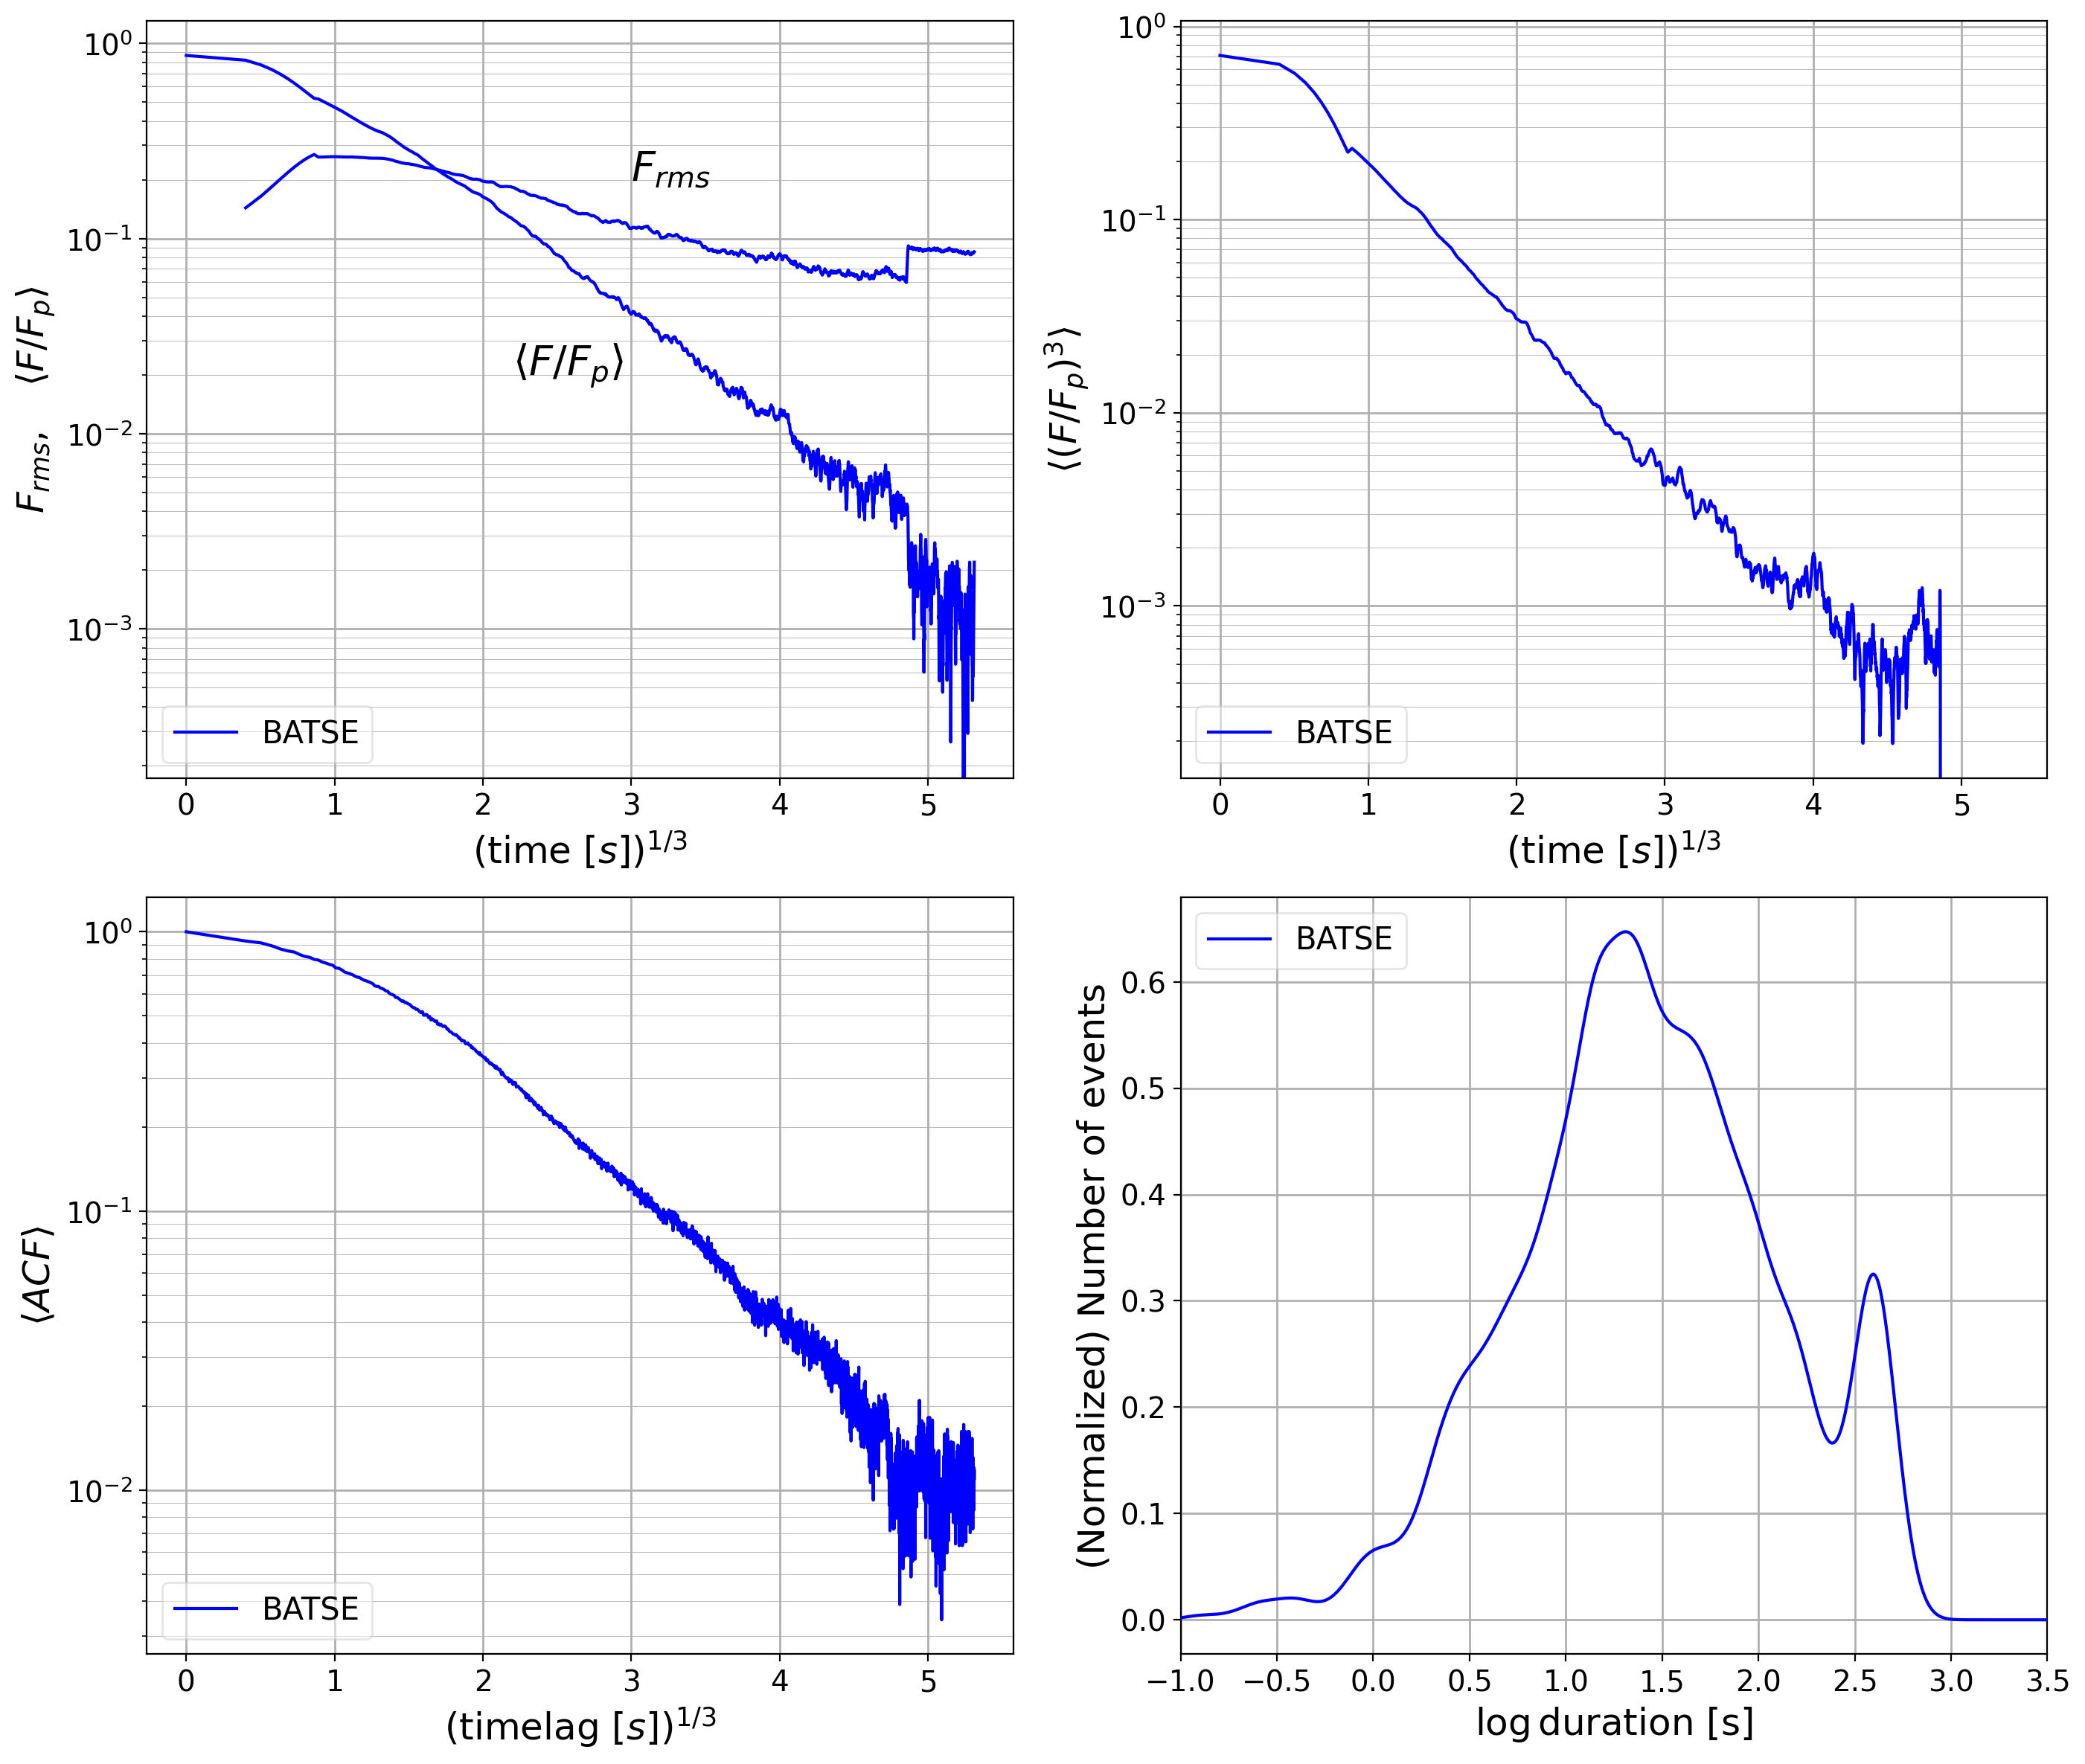

In [33]:
# BATSE ONLY
make_plot_one(instrument='batse',
              test_times=test_times_batse, 
              averaged_fluxes=averaged_fluxes_batse,          
              averaged_fluxes_rms=averaged_fluxes_rms_batse,  
              averaged_fluxes_cube=averaged_fluxes_cube_batse,
              steps=steps_batse, bin_time=bin_time_batse, 
              acf=acf_batse,                                  
              duration=duration_batse,                        
              # mode
              log=True, hist=False, 
              # error bars
              err_bars=False, sigma=1,
              n_grb_real=len(grb_list_batse),                          
              averaged_fluxes_cube_rms=averaged_fluxes_cube_rms_batse, 
              acf_rms=acf_rms_batse,                 
              save_fig=False)

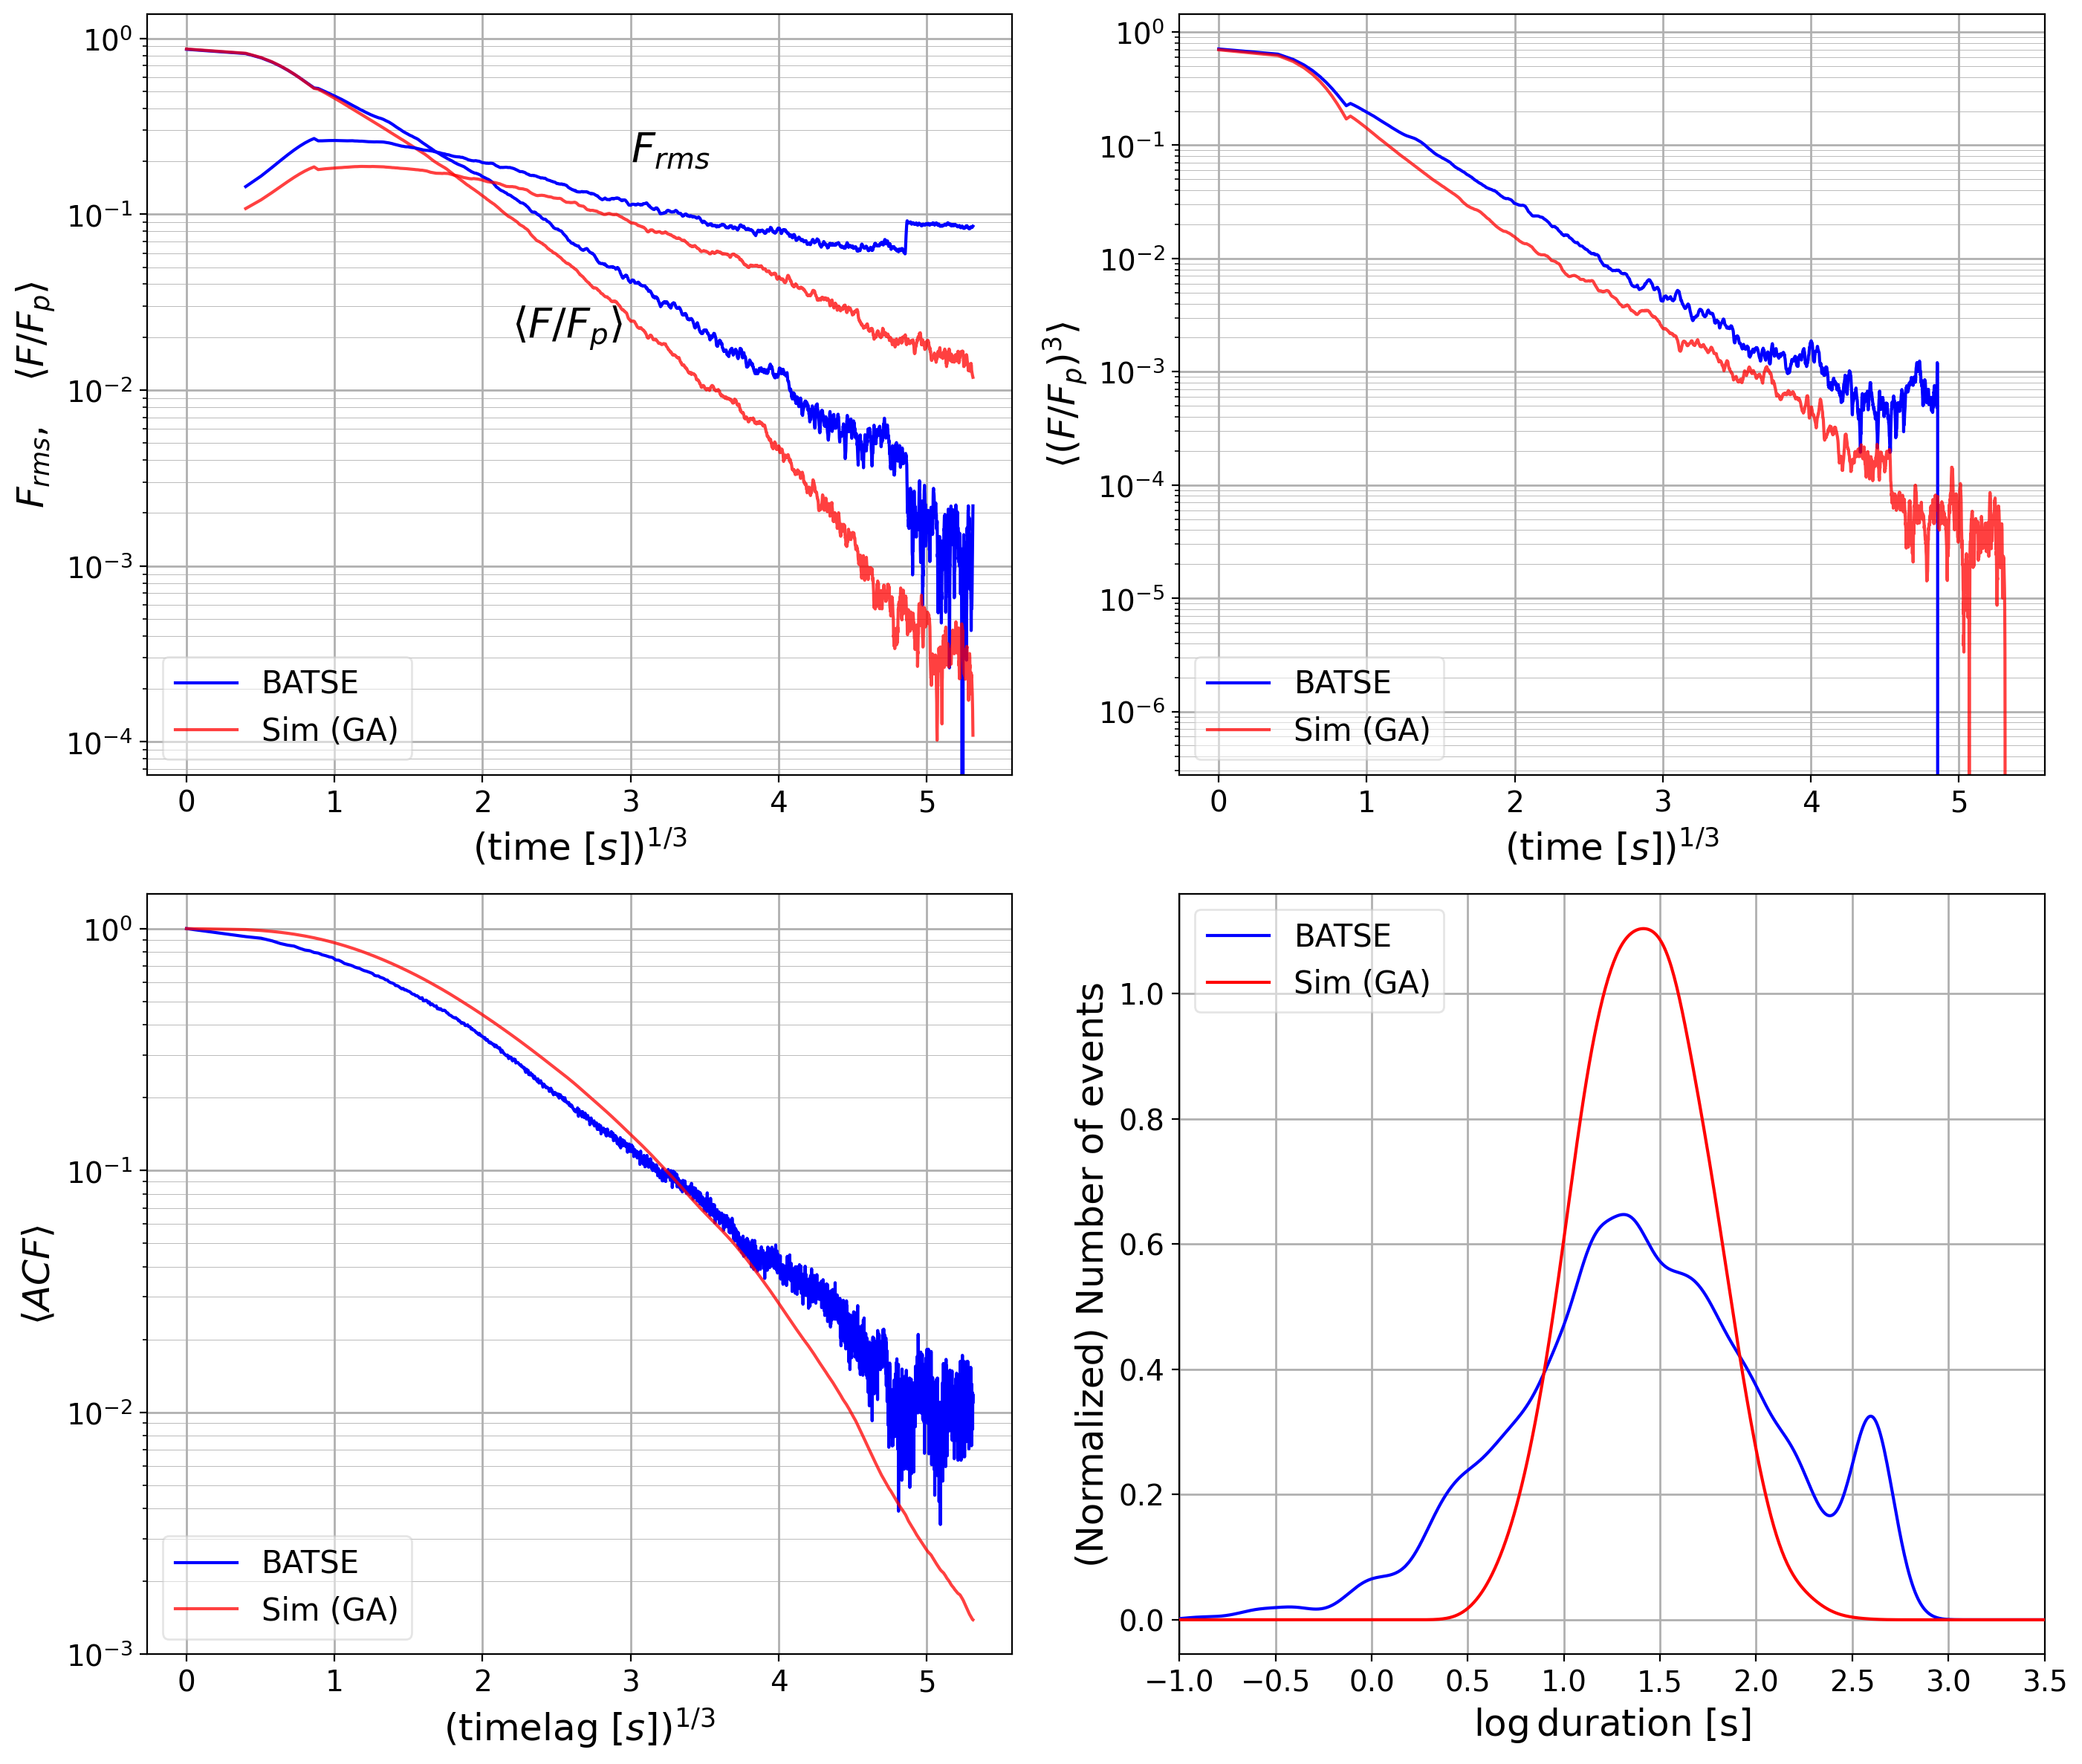

In [35]:
# 7 PARAMETERS FROM THE GENETIC ALGORITHM
make_plot(instrument='batse',
          test_times=test_times_batse, 
          averaged_fluxes=averaged_fluxes_batse,           averaged_fluxes_sim=averaged_fluxes_sim_batse,
          averaged_fluxes_rms=averaged_fluxes_rms_batse,   averaged_fluxes_rms_sim=averaged_fluxes_rms_sim_batse,
          averaged_fluxes_cube=averaged_fluxes_cube_batse, averaged_fluxes_cube_sim=averaged_fluxes_cube_sim_batse,
          steps=steps_batse, steps_sim=steps_sim_batse,    bin_time=bin_time_batse, 
          acf=acf_batse,                                   acf_sim=acf_sim_batse,
          duration=duration_batse,                         duration_sim=duration_sim_batse,
          # mode
          log=True, hist=False, 
          # error bars
          err_bars=False, sigma=1,
          n_grb_real=len(grb_list_batse),                          n_grb_sim=len(grb_list_sim_batse),
          averaged_fluxes_cube_rms=averaged_fluxes_cube_rms_batse, averaged_fluxes_cube_rms_sim=averaged_fluxes_cube_rms_sim_batse,
          acf_rms=acf_rms_batse,                                   acf_rms_sim=acf_rms_sim_batse,
          save_fig=False, name_fig=savefolder+'/metrics2.png')

In [50]:
def make_plot_5metrics(instrument, 
                       test_times, 
                       # plot 1
                       averaged_fluxes,      
                       averaged_fluxes_sim,
                       averaged_fluxes_rms,  
                       averaged_fluxes_rms_sim,
                       # plot 2
                       averaged_fluxes_cube, 
                       averaged_fluxes_cube_sim,
                       # plot 3
                       steps, 
                       steps_sim, 
                       bin_time, 
                       acf, 
                       acf_sim,
                       # plot 4
                       duration, 
                       duration_sim,
                       #plot 5
                       sn_real,
                       sn_sim,
                       # mode
                       log=True, 
                       hist=False, 
                       # error bars
                       err_bars=False, 
                       sigma=1,
                       averaged_fluxes_cube_rms=None, 
                       averaged_fluxes_cube_rms_sim=None,
                       acf_rms=None,                  
                       acf_rms_sim=None,
                       n_grb_real=None,               
                       n_grb_sim=None, 
                       # save plot
                       save_fig=False, 
                       name_fig=savefolder+'/fig5metrics.pdf'):
    """
    Make plot as in Stern et al., 1996.
    """

    fig = plt.figure(figsize=(20, 12), dpi=300)
    ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
    ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
    ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
    ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
    ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)

    if instrument=='batse':
        label_instr='BATSE'
        label_sim='Sim (GA)'
        #n_grb_real=578
    elif instrument=='swift':
        label_instr='Swift'
        label_sim='Sim (GA)'
        #n_grb_real=531
    elif instrument=='sax':
        label_instr='BeppoSAX'
        label_sim='Sim (GA)'
        #n_grb_real=121 # #TODO: check this number
    elif instrument=='fermi':
        label_instr='Fermi'
        label_sim='Sim (GA)'
        #n_grb_real=245 # #TODO: check this number
    else:
        raise NameError('Variable "instrument" not defined properly; choose between: "batse", "swift", "sax", "fermi".')

    averaged_fluxes          = np.array(averaged_fluxes)
    averaged_fluxes_sim      = np.array(averaged_fluxes_sim)
    averaged_fluxes_rms      = np.array(averaged_fluxes_rms)
    averaged_fluxes_rms_sim  = np.array(averaged_fluxes_rms_sim)
    averaged_fluxes_cube     = np.array(averaged_fluxes_cube)
    averaged_fluxes_cube_sim = np.array(averaged_fluxes_cube_sim)
    acf                      = np.array(acf)
    acf_sim                  = np.array(acf_sim)
    duration                 = np.array(duration)
    duration_sim             = np.array(duration_sim)
    s2n_distr                = np.array(sn_real)
    s2n_distr_sim            = np.array(sn_sim)

    #--------------------------------------------------------------------------#
    # <(F/F_p)>
    #--------------------------------------------------------------------------#

    # plots
    ax1.plot(test_times**(1/3),     averaged_fluxes,                color='b', lw=1.5, alpha=1.00, label=label_instr)
    ax1.plot(test_times**(1/3),     averaged_fluxes_sim,            color='r', lw=1.5, alpha=0.75, label=label_sim)
    ax1.plot(test_times[1:]**(1/3), averaged_fluxes_rms[1:],        color='b', lw=1.5, alpha=1.00)
    ax1.plot(test_times[1:]**(1/3), averaged_fluxes_rms_sim[1:],    color='r', lw=1.5, alpha=0.75)
    # error bars
    if err_bars:
        errs     = averaged_fluxes_rms     / np.sqrt(n_grb_real)
        errs_sim = averaged_fluxes_rms_sim / np.sqrt(n_grb_sim)
        #
        ax1.fill_between(test_times**(1/3),
                         averaged_fluxes-sigma*errs,
                         averaged_fluxes+sigma*errs,
                         color='b',
                         alpha=0.2) 
        ax1.fill_between(test_times**(1/3),
                         averaged_fluxes_sim-sigma*errs_sim,
                         averaged_fluxes_sim+sigma*errs_sim,
                         color='r',
                         alpha=0.2)
    # set scale
    if log:
        ax1.set_yscale('log', base=10) 
        #ax[0,0].set_xlim(0,test_times[-1]**(1/3))
        if err_bars:
            ax1.set_ylim(1.e-3, 1.2)
    else:
        pass
        #ax[0,0].set_xlim(0,test_times[-1]**(1/3))
    # set labels
    ax1.set_xlabel(r'$(\mathrm{time}\ [s])^{1/3}$', size=18)
    if log:
        ax1.set_ylabel(r'$F_{rms},\quad \langle F/F_p\rangle$', size=18)
        #ax[0,0].set_ylabel(r'$\log F_{rms},\quad \log \langle F/F_p\rangle$', size=18)
    else:
        ax1.set_ylabel(r'$F_{rms},\quad \langle F/F_p\rangle$', size=18)
    #
    ax1.text(3,   10**(-0.7), r'$F_{rms}$',              fontsize=20)
    ax1.text(2.2, 10**(-1.7), r'$\langle F/F_p\rangle$', fontsize=20)
    #
    ax1.grid(True, which="major", lw=1.0, ls="-")
    ax1.grid(True, which="minor", lw=0.3, ls="-")
    ax1.xaxis.set_tick_params(labelsize=14)
    ax1.yaxis.set_tick_params(labelsize=14)
    ax1.legend(prop={'size':15}, loc="lower left", facecolor='white', framealpha=0.5)

    #--------------------------------------------------------------------------#
    # <(F/F_p)^3>
    #--------------------------------------------------------------------------#

    # plots
    ax2.plot(test_times**(1/3), averaged_fluxes_cube,     color='b', lw=1.5, label=label_instr)
    ax2.plot(test_times**(1/3), averaged_fluxes_cube_sim, color='r', lw=1.5, label=label_sim, alpha=0.75)
    # error bars
    if err_bars:
        errs     = averaged_fluxes_cube_rms     / np.sqrt(n_grb_real)
        errs_sim = averaged_fluxes_cube_rms_sim / np.sqrt(n_grb_sim)
        #
        ax2.fill_between(test_times**(1/3),
                         averaged_fluxes_cube-sigma*errs,
                         averaged_fluxes_cube+sigma*errs,
                         color='b',
                         alpha=0.2) 
        ax2.fill_between(test_times**(1/3),
                         averaged_fluxes_cube_sim-sigma*errs_sim,
                         averaged_fluxes_cube_sim+sigma*errs_sim,
                         color='r',
                         alpha=0.2)

    # set scale
    if log:
        ax2.set_yscale('log', base=10)
        #ax[0,1].set_xlim(0,test_times[-1]**(1/3))
        if err_bars:
            ax2.set_ylim(7.e-5, 1)
    else:
        pass
        #ax[0,1].set_xlim(0,test_times[-1]**(1/3))
    # set labels
    ax2.set_xlabel(r'$(\mathrm{time}\ [s])^{1/3}$', size=18)
    if log:
        ax2.set_ylabel(r'$\langle (F/F_p)^3 \rangle$', size=18)
        #ax[0,1].set_ylabel(r'$\log \langle (F/F_p)^3 \rangle$', size=18)
    else:
        ax2.set_ylabel(r'$\langle (F/F_p)^3 \rangle$', size=18)
    #
    ax2.grid(True, which="major", lw=1.0, ls="-")
    ax2.grid(True, which="minor", lw=0.3, ls="-")
    ax2.xaxis.set_tick_params(labelsize=14)
    ax2.yaxis.set_tick_params(labelsize=14)
    ax2.legend(prop={'size':15}, loc="lower left", facecolor='white', framealpha=0.5)

    #--------------------------------------------------------------------------#
    # AUTOCORRELATION
    #--------------------------------------------------------------------------#

    # plots
    ax3.plot((steps    *bin_time)**(1/3), acf,     color='b', lw=1.5, label=label_instr)
    ax3.plot((steps_sim*bin_time)**(1/3), acf_sim, color='r', lw=1.5, label=label_sim, alpha=0.75)
    # error bars
    if err_bars:
        errs     = acf_rms     / np.sqrt(n_grb_real)
        errs_sim = acf_rms_sim / np.sqrt(n_grb_sim)
        #
        ax3.fill_between((steps*bin_time)**(1/3),
                         acf-sigma*errs,
                         acf+sigma*errs,
                         color='b',
                         alpha=0.2) 
        ax3.fill_between((steps_sim*bin_time)**(1/3),
                         acf_sim-sigma*errs_sim,
                         acf_sim+sigma*errs_sim,
                         color='r',
                         alpha=0.2)
    # set scale
    if log:
        ax3.set_yscale('log', base=10)
    else:
        pass
    # set labels
    ax3.set_xlabel(r'$(\mathrm{timelag}\ [s])^{1/3}$', size=18)
    if log:
        ax3.set_ylabel(r'$\langle ACF \rangle$', size=18)
        #ax[1,0].set_ylabel(r'$\log \langle ACF \rangle$', size=18)
    else:
        ax3.set_ylabel(r'$\langle ACF \rangle$', size=18)
    #
    ax3.grid(True, which="major", lw=1.0, ls="-")
    ax3.grid(True, which="minor", lw=0.3, ls="-")
    ax3.xaxis.set_tick_params(labelsize=14)
    ax3.yaxis.set_tick_params(labelsize=14)
    ax3.set_ylim(1e-3,2)
    ax3.legend(prop={'size':15}, loc="lower left", facecolor='white', framealpha=0.5)

    #--------------------------------------------------------------------------#
    # DISTRIBUTION OF DURATIONS
    #--------------------------------------------------------------------------#

    if log:
        duration     = np.log10(duration)
        duration_sim = np.log10(duration_sim)
    if log:
        range_hist = [-1.0, 3.5]
    else:
        range_hist = None

    if hist:
        # histogram
        n_bins=30
        n1, bins = np.histogram(a=duration,     bins=n_bins, range=range_hist)
        n2, bins = np.histogram(a=duration_sim, bins=n_bins, range=range_hist)

        bin_centres = 0.5 * (bins[:-1] + bins[1:])

        ax4.bar(x=bins[:-1], 
                    height=n1/(np.diff(bins)[0]*len(duration)),     
                    width=np.diff(bins), 
                    align='edge',
                    #facecolor='None',
                    #edgecolor='b',
                    #linewidth=2,
                    alpha=0.6,
                    color='b',
                    label=label_instr)
        ax4.bar(x=bins[:-1], 
                    height=n2/(np.diff(bins)[0]*len(duration_sim)), 
                    width=np.diff(bins), 
                    align='edge',
                    #facecolor='None',
                    edgecolor='r',
                    linewidth=2,
                    alpha=0.4,
                    color='r',
                    label='Simulated')

        ax4.set_ylim(-0.025,1.0)

        if err_bars:
            # Plot the error bars, centred on (bin_centre, bin_count), with length y_error
            ax4.errorbar(x=bin_centres, 
                             y=n1/(np.diff(bins)[0]*len(duration)),
                             yerr=sigma*np.sqrt(n1)/(np.diff(bins)[0]*len(duration)), 
                             fmt='.', 
                             color='b',
                             capsize=3,
                             elinewidth=1.5)
            ax4.errorbar(x=bin_centres, 
                             y=n2/(np.diff(bins)[0]*len(duration_sim)),
                             yerr=sigma*np.sqrt(n2)/(np.diff(bins)[0]*len(duration_sim)), 
                             fmt='.', 
                             color='r',
                             capsize=3,
                             elinewidth=1.5)


    else: 
        # kernel density estimation
        h_opt = 0.09 # values obtained with GridSearch optimization (see the notebook in DEBUG section)
        if log:
            x_grid = np.linspace(-2,    5, 1000)
        else:
            x_grid = np.linspace(-2, 1000, 1000)
        y_plot_real  = stats.norm.pdf(x_grid, duration[:, None],     h_opt)
        y_plot_sim   = stats.norm.pdf(x_grid, duration_sim[:, None], h_opt)
        y_plot_real /= (len(duration))
        y_plot_sim  /= (len(duration_sim))
        kde_real     = y_plot_real.sum(0)
        kde_sim      = y_plot_sim.sum(0)
        # plot
        ax4.plot(x_grid, kde_real, c='b', lw=1.5, label=label_instr, zorder=5)
        ax4.plot(x_grid, kde_sim,  c='r', lw=1.5, label=label_sim,   zorder=6)
        # errors
        if err_bars:
            n_resample=500
            kde_real_r_stack     = np.zeros([len(kde_real),n_resample])
            kde_real_r_stack_sim = np.zeros([len(kde_sim), n_resample])
            for i in range(n_resample):
                dur_resampled_real = resample(duration,     replace=True)
                dur_resampled_sim  = resample(duration_sim, replace=True)
                y_plot_real_r      = stats.norm.pdf(x_grid, dur_resampled_real[:, None], h_opt)
                y_plot_sim_r       = stats.norm.pdf(x_grid, dur_resampled_sim[:, None],  h_opt)
                y_plot_real_r     /= (len(dur_resampled_real))
                y_plot_sim_r      /= (len(dur_resampled_sim))
                kde_real_r         = y_plot_real_r.sum(0)
                kde_sim_r          = y_plot_sim_r.sum(0)
                kde_real_r_stack[:,i]     = kde_real_r
                kde_real_r_stack_sim[:,i] = kde_sim_r
                # plot
                # ax[1,1].plot(x_grid, kde_real_r, c='cyan',   lw=1, alpha=0.05, zorder=3)
                # ax[1,1].plot(x_grid, kde_sim_r,  c='orange', lw=1, alpha=0.05, zorder=4)
            rms     = np.std(kde_real_r_stack,     axis=1)
            rms_sim = np.std(kde_real_r_stack_sim, axis=1)
            errs     = rms     #/ np.sqrt(n_resample)
            errs_sim = rms_sim #/ np.sqrt(n_resample)
            ax4.fill_between(x_grid,
                                 kde_real-sigma*errs,
                                 kde_real+sigma*errs,
                                 color='b',
                                 alpha=0.2,
                                 zorder=1) 
            ax4.fill_between(x_grid,
                                 kde_sim-sigma*errs_sim,
                                 kde_sim+sigma*errs_sim,
                                 color='r',
                                 alpha=0.2,
                                 zorder=2)

    # set scale
    if log:
        ax4.set_xlim(-1.0,3.5)
    else:
        pass
    # set label
    ax4.set_ylabel('(Normalized) Number of events',    size=18)
    if log:
        ax4.set_xlabel(r'$\log\mathrm{duration}$ [s]', size=18)
    else:
        ax4.set_xlabel(r'$\mathrm{duration}$ [s]',     size=18)
    #
    ax4.grid(True, which="major", lw=1.0, ls="-")
    ax4.grid(True, which="minor", lw=0.3, ls="-")
    ax4.xaxis.set_tick_params(labelsize=14)
    ax4.yaxis.set_tick_params(labelsize=14)
    ax4.legend(prop={'size':15}, loc="upper left", facecolor='white', framealpha=0.5)

    #--------------------------------------------------------------------------#
    # SNR DISTRIBUTIONS
    #--------------------------------------------------------------------------#
    
    nbins     = 40
    binmin    = np.min(s2n_distr_sim)
    binmax    = np.max(s2n_distr_sim)
    bin_edges = np.logspace(np.log10(binmin), np.log10(binmax), nbins+1)

    #--------------------------------------------------------------------------#

    new_bins, new_counts = rebin_histogram(bin_edges=bin_edges,
                                           data=s2n_distr_sim,
                                           n_min=20)
    #--------------------------------------------------------------------------#

    new_bins[-1] = np.max( [np.max(s2n_distr_sim), np.max(s2n_distr)] )
    
    # Bar plot
    x_bar      = new_bins[:-1]
    height_bar = new_counts/(sum(new_counts)*np.diff(new_bins)) # Prob. density
    width_bar  = np.diff(new_bins)
    ax5.bar(x=x_bar, height=height_bar, width=width_bar, align='edge', fc='skyblue', ec='blue', lw=2, label=label_sim, alpha=0.9)
    
    # Histogram
    ax5.hist(s2n_distr, bins=new_bins, label=label_instr,  color='r', fc = 'salmon', ec='red', linewidth=2, density=True, alpha=0.99, hatch='/') 

    ax5.set_xlabel(r'S/N', size=18)
    ax5.set_ylabel(r'$\dfrac{\mathrm{d}N}{\mathrm{d(S/N)}}$', size=18)
    ax5.set_xticks(new_bins[::3])
    ax5.xaxis.set_tick_params(labelsize=14)
    ax5.yaxis.set_tick_params(labelsize=14)
    ax5.grid(which='both', color = 'silver', alpha = 0.5)
    ax5.loglog()
    ax5.legend(prop={'size':15}, loc="upper left", facecolor='white', framealpha=0.5)

    #--------------------------------------------------------------------------#
    #--------------------------------------------------------------------------#

    plt.tight_layout()
    if(save_fig):
        plt.savefig(name_fig)

    plt.show()

In [51]:
make_plot_5metrics(instrument='batse',
                   test_times=test_times_batse, 
                   averaged_fluxes=averaged_fluxes_batse,
                   averaged_fluxes_sim=averaged_fluxes_sim_batse,
                   averaged_fluxes_rms=averaged_fluxes_rms_batse,
                   averaged_fluxes_rms_sim=averaged_fluxes_rms_sim_batse,
                   averaged_fluxes_cube=averaged_fluxes_cube_batse,
                   averaged_fluxes_cube_sim=averaged_fluxes_cube_sim_batse,
                   steps=steps_batse, steps_sim=steps_sim_batse,
                   bin_time=bin_time_batse, 
                   acf=acf_batse,
                   acf_sim=acf_sim_batse,
                   duration=duration_batse,
                   duration_sim=duration_sim_batse,
                   sn_real=batse_real_SNlist,
                   sn_sim=batse_sim_SNlist,
                   # mode
                   log=True,
                   hist=False, 
                   # error bars
                   err_bars=True,
                   sigma=1,
                   n_grb_real=len(grb_list_batse),
                   n_grb_sim=len(grb_list_sim_batse),
                   averaged_fluxes_cube_rms=averaged_fluxes_cube_rms_batse,
                   averaged_fluxes_cube_rms_sim=averaged_fluxes_cube_rms_sim_batse,
                   acf_rms=acf_rms_batse,
                   acf_rms_sim=acf_rms_sim_batse,
                   save_fig=False,
                   name_fig='5metrics_batse.pdf')

5000 5000


In [42]:
# Assign these variables to the GA optimized quantities
#
averaged_fluxes_sim_batse_ga      = averaged_fluxes_sim_batse
averaged_fluxes_rms_sim_batse_ga  = averaged_fluxes_rms_sim_batse
averaged_fluxes_cube_sim_batse_ga = averaged_fluxes_cube_sim_batse
steps_sim_batse_ga                = steps_sim_batse
acf_sim_batse_ga                  = acf_sim_batse
duration_sim_batse_ga             = duration_sim_batse

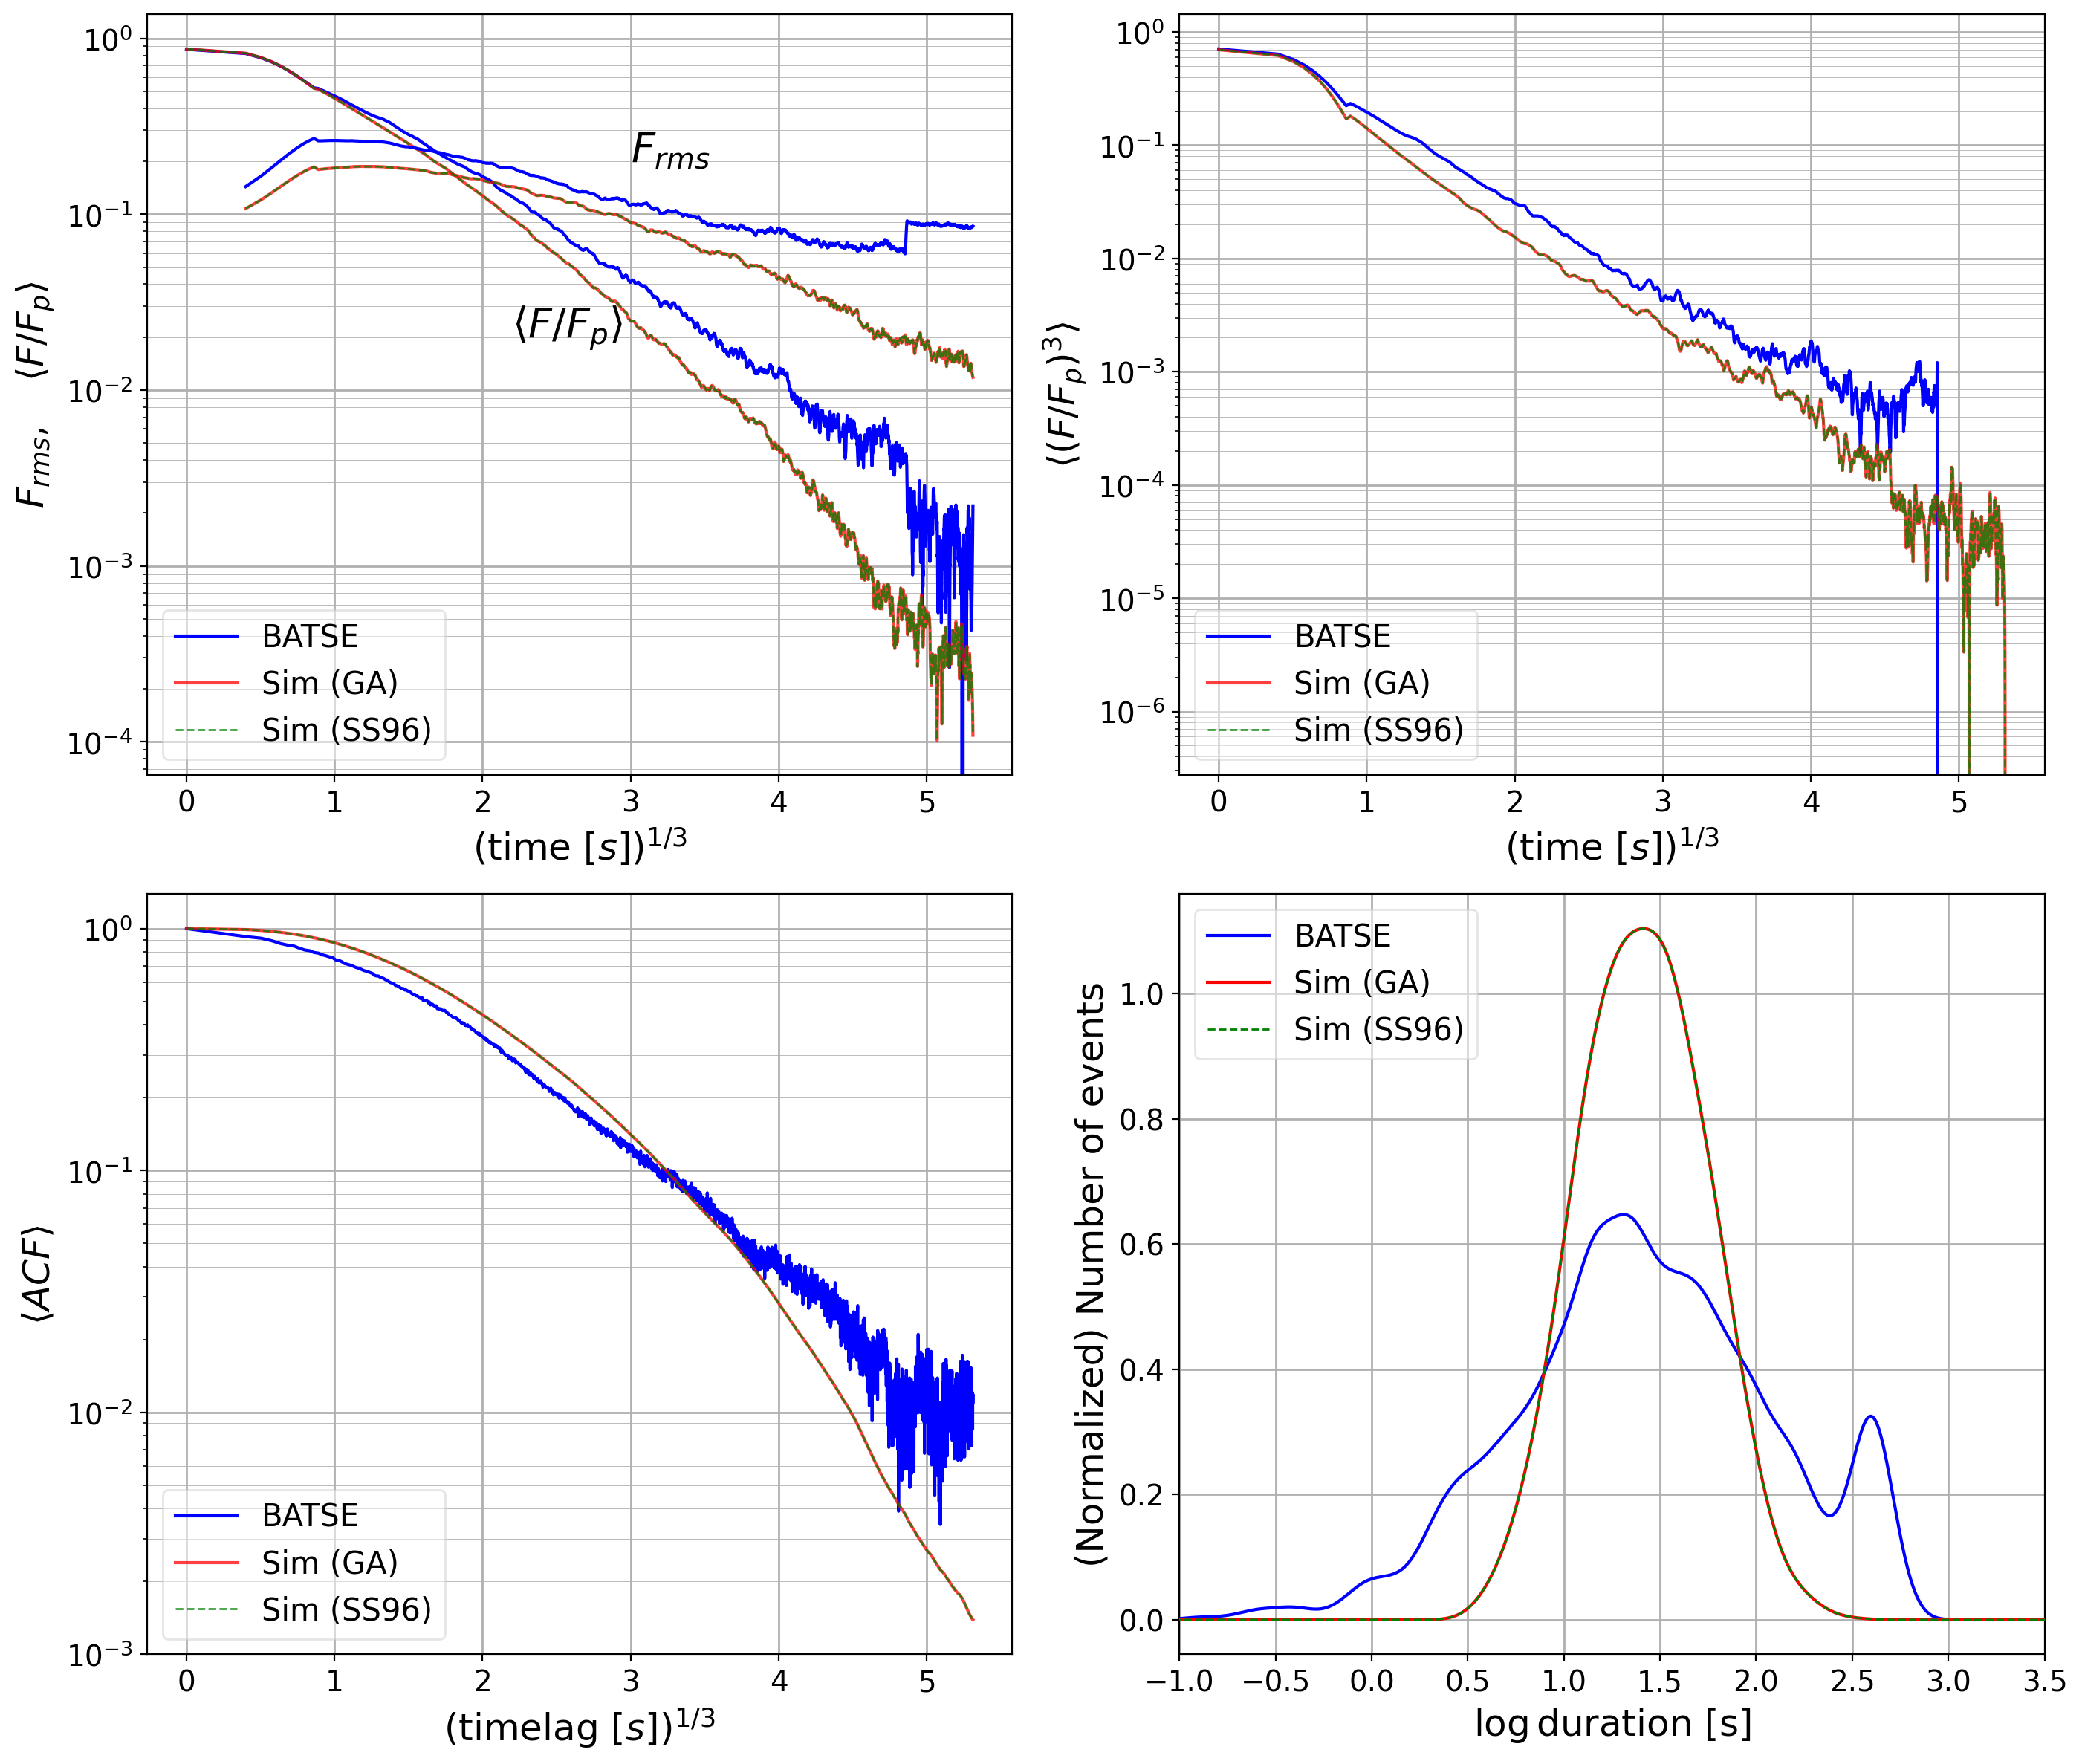

In [45]:
# 7 PARAMETERS FROM THE GENETIC ALGORITHM
make_plot_2sim(instrument='batse',
               test_times=test_times_batse, 
               averaged_fluxes=averaged_fluxes_batse,           averaged_fluxes_sim=averaged_fluxes_sim_batse, averaged_fluxes_sim_ga=averaged_fluxes_sim_batse_ga,
               averaged_fluxes_rms=averaged_fluxes_rms_batse,   averaged_fluxes_rms_sim=averaged_fluxes_rms_sim_batse, averaged_fluxes_rms_sim_ga=averaged_fluxes_rms_sim_batse_ga,
               averaged_fluxes_cube=averaged_fluxes_cube_batse, averaged_fluxes_cube_sim=averaged_fluxes_cube_sim_batse, averaged_fluxes_cube_sim_ga=averaged_fluxes_cube_sim_batse_ga,
               steps=steps_batse, steps_sim=steps_sim_batse,    steps_sim_ga=steps_sim_batse_ga, bin_time=bin_time_batse, 
               acf=acf_batse,                                   acf_sim=acf_sim_batse, acf_sim_ga=acf_sim_batse_ga,
               duration=duration_batse,                         duration_sim=duration_sim_batse, duration_sim_ga=duration_sim_batse_ga,
               # mode
               log=True, hist=False, 
               # error bars
               err_bars=False, sigma=1,
               n_grb_real=len(grb_list_batse),                          n_grb_sim=len(grb_list_sim_batse),
               averaged_fluxes_cube_rms=averaged_fluxes_cube_rms_batse, averaged_fluxes_cube_rms_sim=averaged_fluxes_cube_rms_sim_batse,
               acf_rms=acf_rms_batse,                                   acf_rms_sim=acf_rms_sim_batse,
               save_fig=True, name_fig='4observables_L_tot_4_comparison.pdf')

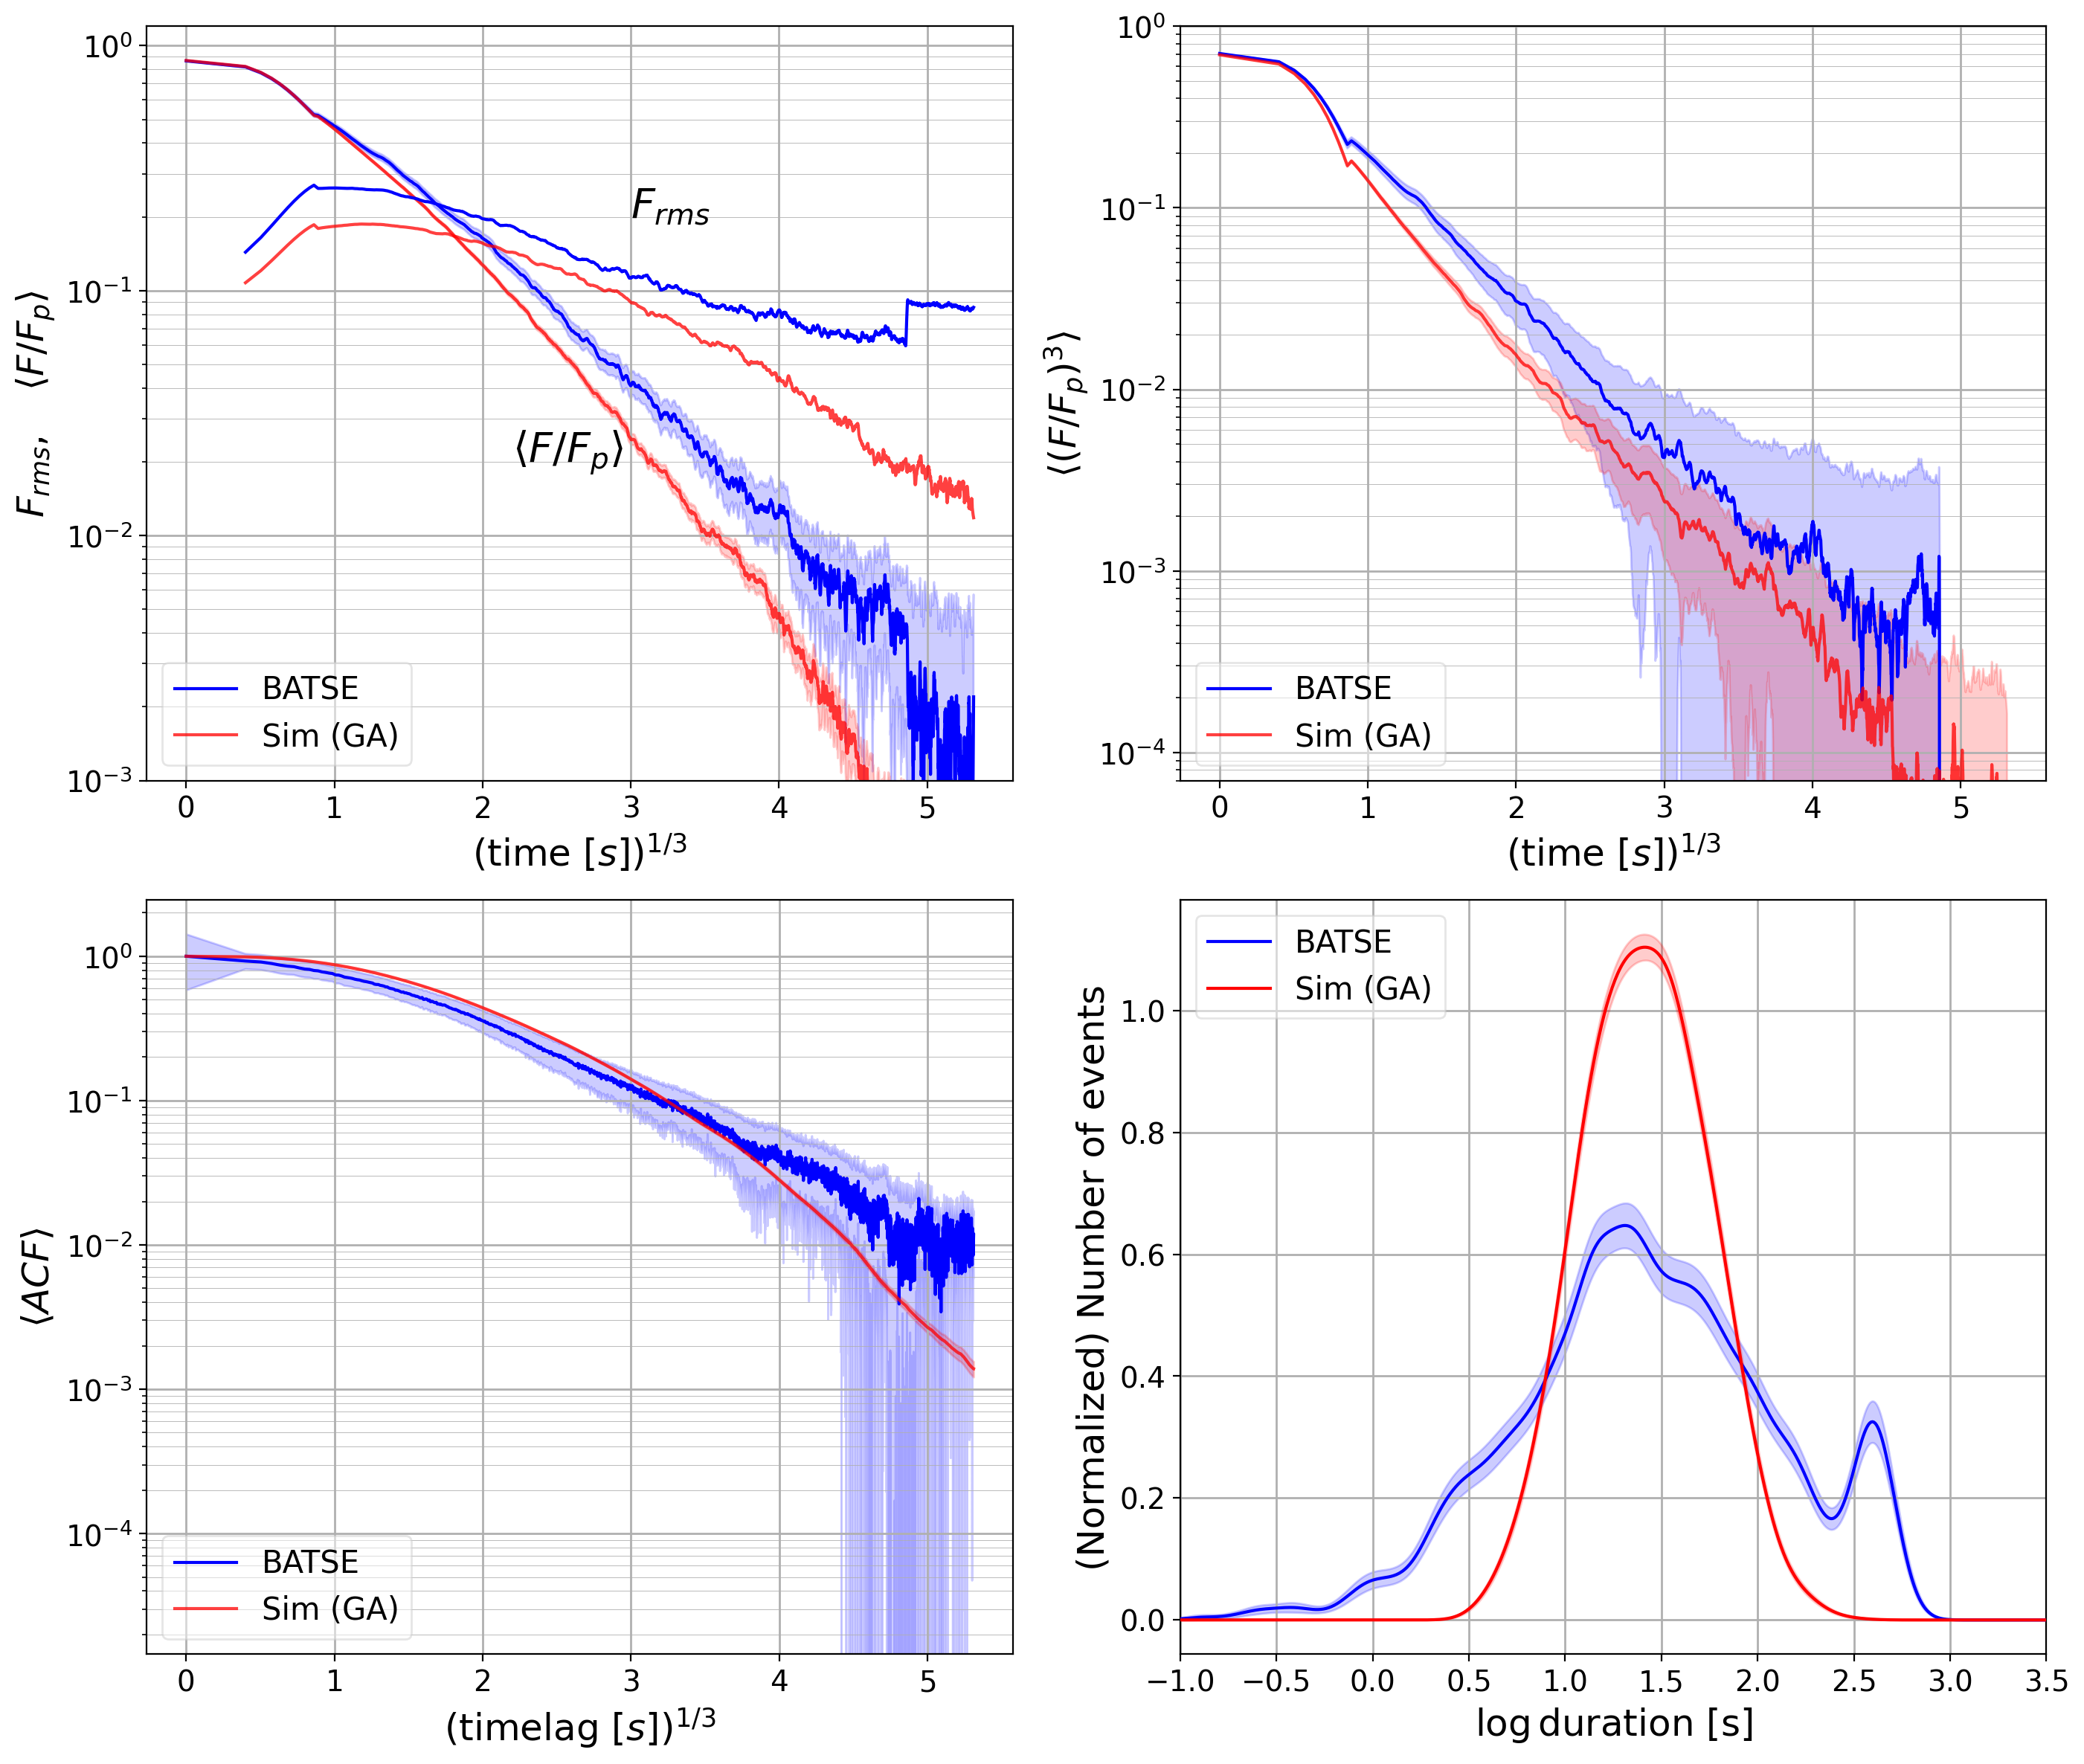

In [48]:
# 7 PARAMETERS FROM THE GENETIC ALGORITHM
make_plot(instrument='batse',
          test_times=test_times_batse, 
          averaged_fluxes=averaged_fluxes_batse,           averaged_fluxes_sim=averaged_fluxes_sim_batse,
          averaged_fluxes_rms=averaged_fluxes_rms_batse,   averaged_fluxes_rms_sim=averaged_fluxes_rms_sim_batse,
          averaged_fluxes_cube=averaged_fluxes_cube_batse, averaged_fluxes_cube_sim=averaged_fluxes_cube_sim_batse,
          steps=steps_batse, steps_sim=steps_sim_batse, bin_time=bin_time_batse, 
          acf=acf_batse,                                   acf_sim=acf_sim_batse,
          duration=duration_batse,                         duration_sim=duration_sim_batse,
          # mode
          log=True, hist=False, 
          # error bars
          err_bars=True, sigma=1,
          n_grb_real=len(grb_list_batse),                          n_grb_sim=len(grb_list_sim_batse),
          averaged_fluxes_cube_rms=averaged_fluxes_cube_rms_batse, averaged_fluxes_cube_rms_sim=averaged_fluxes_cube_rms_sim_batse,
          acf_rms=acf_rms_batse,                                   acf_rms_sim=acf_rms_sim_batse,
          save_fig=False, name_fig=savefolder+'/4observables_L_tot_4.pdf')

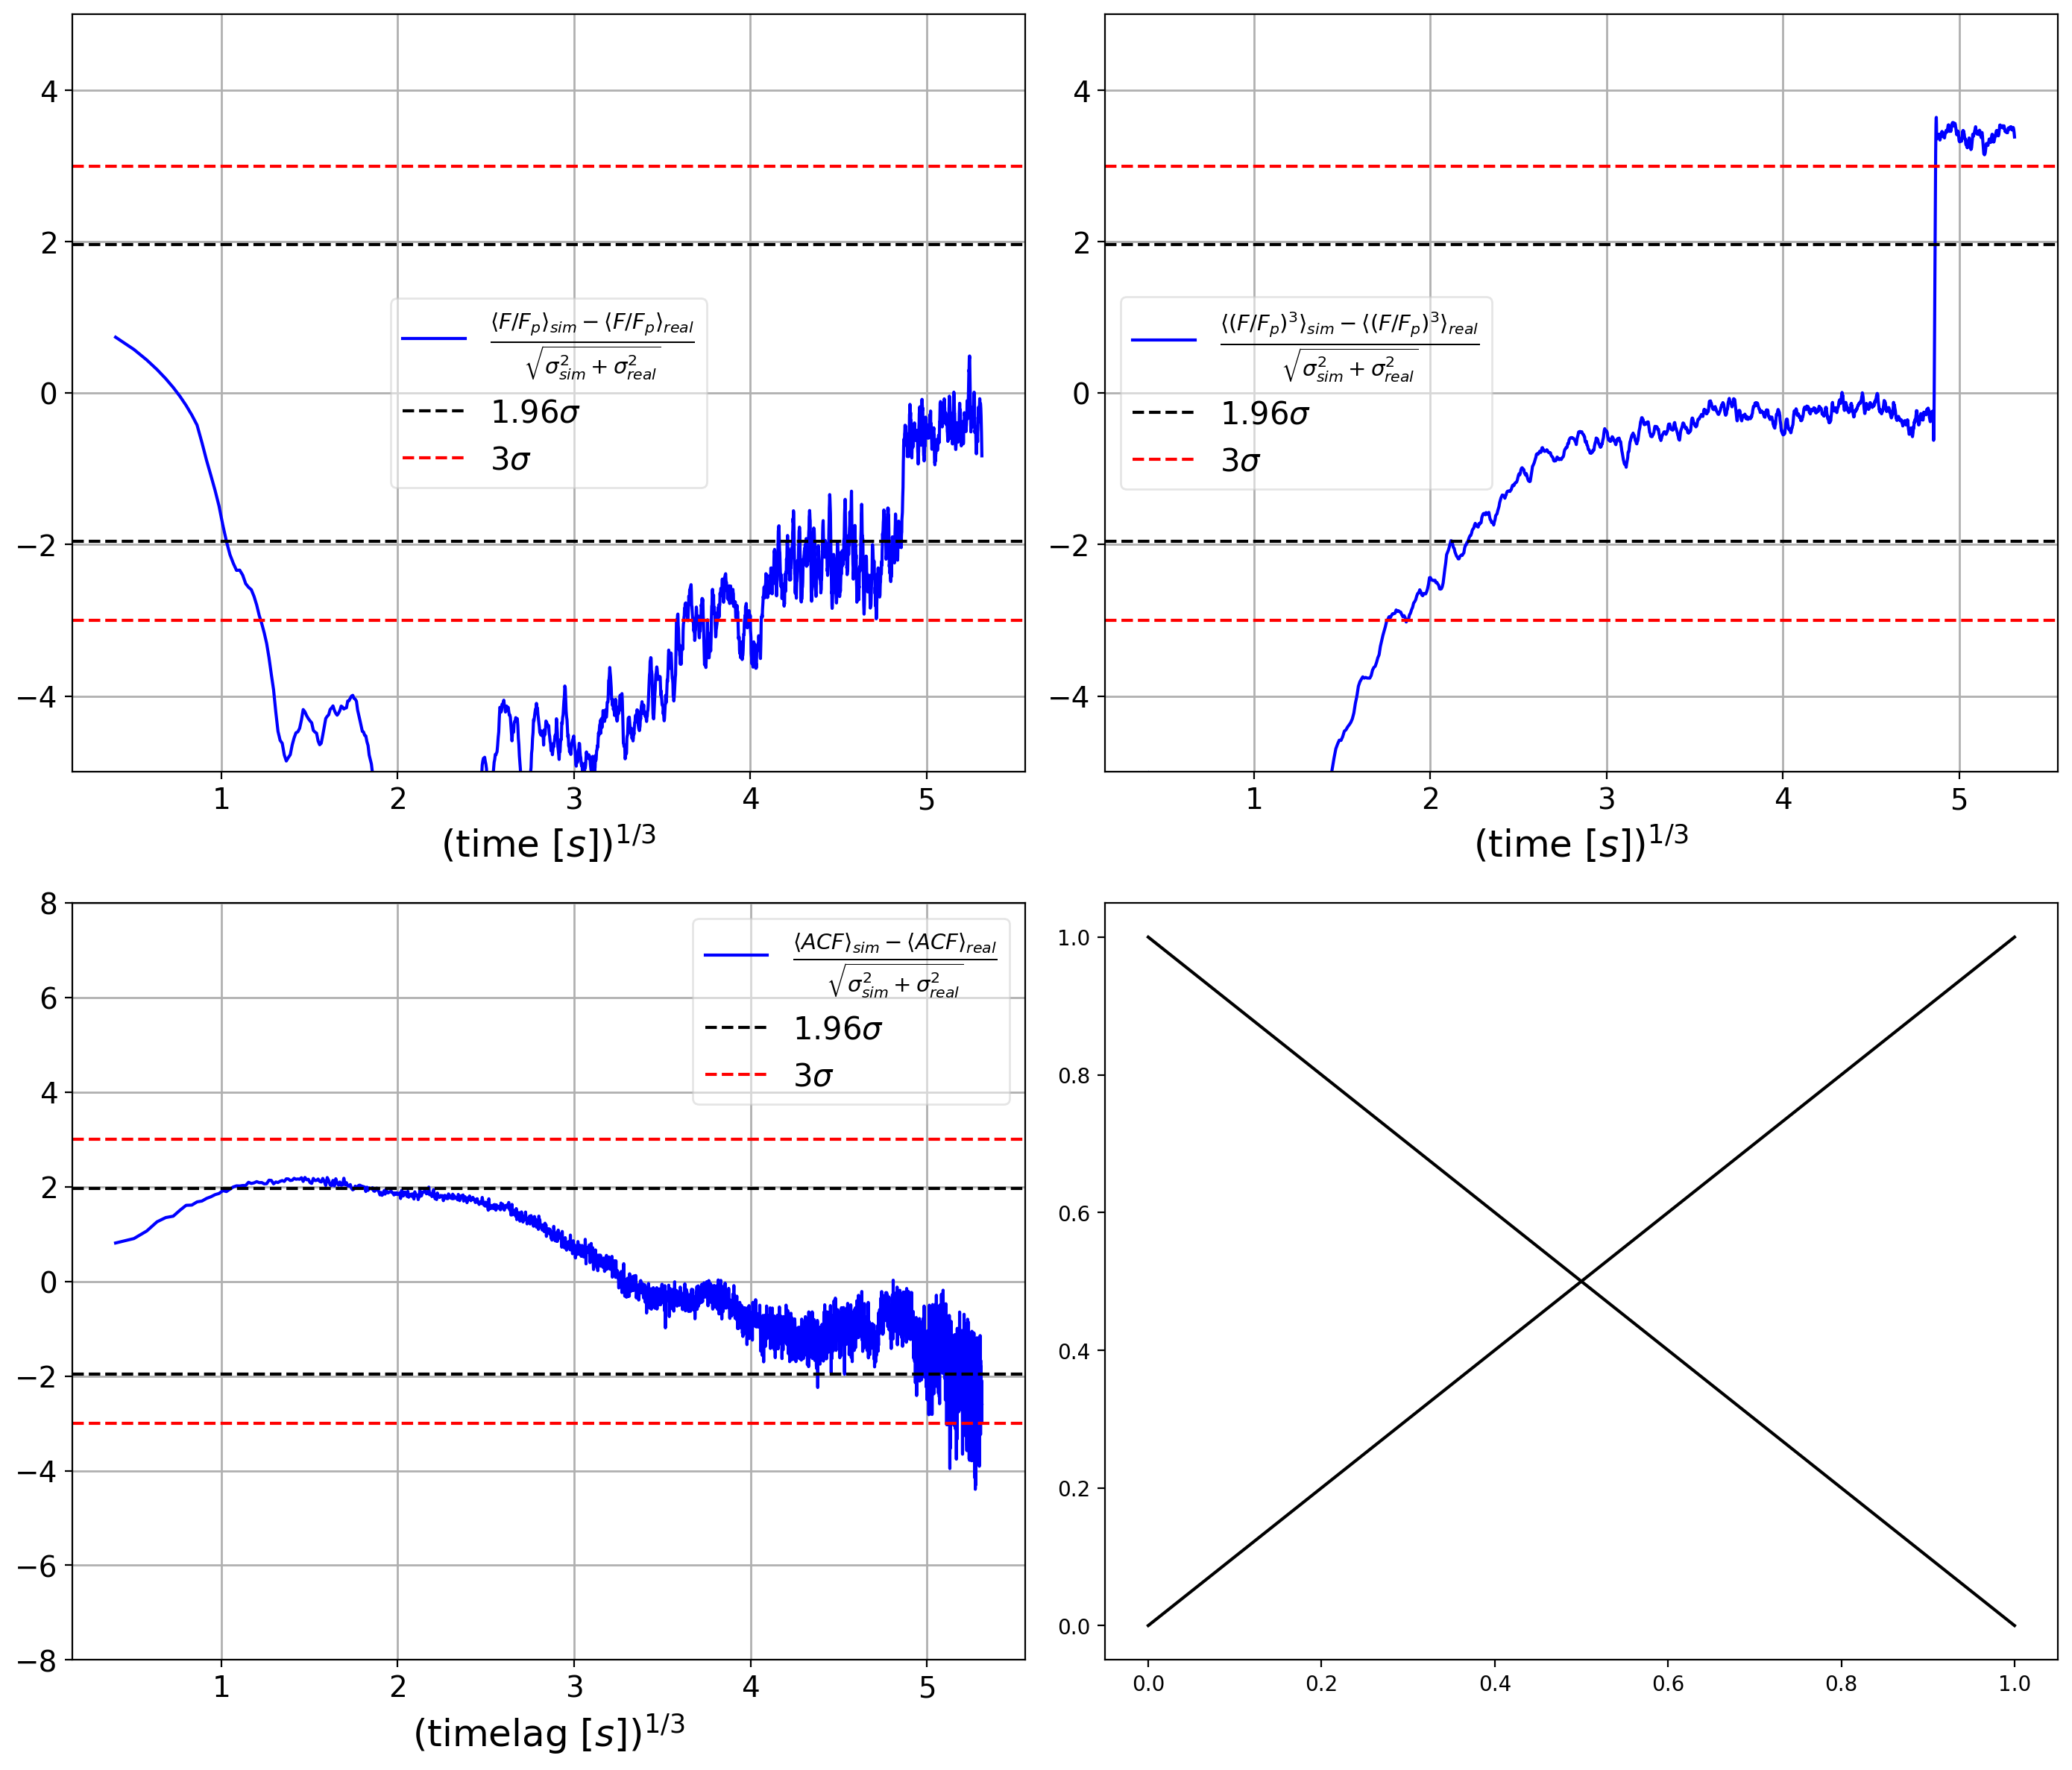

In [49]:
make_plot_errs(test_times=test_times_batse, 
               # plot 1
               averaged_fluxes=averaged_fluxes_batse,           
               averaged_fluxes_sim=averaged_fluxes_sim_batse,
               averaged_fluxes_rms=averaged_fluxes_rms_batse,   
               averaged_fluxes_rms_sim=averaged_fluxes_rms_sim_batse,
               # plot 2
               averaged_fluxes_cube=averaged_fluxes_cube_batse, 
               averaged_fluxes_cube_sim=averaged_fluxes_cube_sim_batse,
               averaged_fluxes_cube_rms=averaged_fluxes_cube_rms_batse, 
               averaged_fluxes_cube_rms_sim=averaged_fluxes_cube_rms_sim_batse,
               # plot 3
               steps=steps_batse,  
               bin_time=bin_time_batse, 
               acf=acf_batse,
               acf_sim=acf_sim_batse,
               acf_rms=acf_rms_batse,
               acf_rms_sim=acf_rms_sim_batse,
               # plot 4
               duration=duration_batse, 
               duration_sim=duration_sim_batse,
               #
               n_grb_real=len(grb_list_batse),
               n_grb_sim=len(grb_list_sim_batse),
               save_fig=True, name_fig='4observables_LOSS_L_tot_4.pdf')

# DEBUG

In [ ]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

x_batse = np.log10(duration_batse)
bwrange = np.linspace(0.01, 1.0, 50) # Test 50 bandwidths from 0.01 to 1.0
#print(bwrange)

K    = 5 # Do 5-fold cross validation
grid = GridSearchCV(KernelDensity(), 
                    {'bandwidth': bwrange}, 
                    cv=K)  # Try each bandwidth with K-folds
# Fit the histogram data
grid.fit(x_batse[:, None]) 
h_opt = grid.best_params_['bandwidth']
print('optimal bandwisth: h_opt =', h_opt)

In [ ]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

x_swift = np.log10(duration_swift)
bwrange = np.linspace(0.01, 1.0, 50) # Test 50 bandwidths from 0.01 to 1.0
#print(bwrange)

K    = 5 # Do 5-fold cross validation
grid = GridSearchCV(KernelDensity(), 
                    {'bandwidth': bwrange}, 
                    cv=K)  # Try each bandwidth with K-folds
# Fit the histogram data
grid.fit(x_swift[:, None]) 
h_opt = grid.best_params_['bandwidth']
print('optimal bandwisth: h_opt =', h_opt)

In [ ]:
from scipy import stats

fig = plt.figure(figsize=(8, 8))
ax  = fig.add_subplot(111)
#
x_grid  = np.linspace(-4, 4, 1000)
y_plot  = stats.norm.pdf(x_grid, x_batse[:, None], h_opt)
y_plot /= (len(x_batse))
#
ax.fill(x_grid, y_plot.sum(0), ec='k', lw=3, fc='k', alpha=0.5)
ax.plot(x_grid, 10*y_plot.T, '-k', lw=0.5, alpha=0.4)
ax.plot(x_batse, 0*x_batse - 0.05, '|', c='k', alpha=0.5)
ax.set_xlim(-0.5,3)

In [ ]:
from scipy import stats

fig = plt.figure(figsize=(8, 8))
ax  = fig.add_subplot(111)
#
x_grid  = np.linspace(-4, 4, 1000)
y_plot  = stats.norm.pdf(x_grid, x_swift[:, None], h_opt)
y_plot /= (len(x_swift))
#
ax.fill(x_grid, y_plot.sum(0), ec='k', lw=3, fc='k', alpha=0.5)
ax.plot(x_grid, 10*y_plot.T, '-k', lw=0.5, alpha=0.4)
ax.plot(x_swift, 0*x_swift - 0.05, '|', c='k', alpha=0.5)
ax.set_xlim(-0.5,4)

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax  = fig.add_subplot(111)
#
x_batse = np.log10(duration_batse)
x_sim   = np.log10(duration_sim_batse)
#
x_grid        = np.linspace(-2, 5, 1000)
y_plot_batse  = stats.norm.pdf(x_grid, x_batse[:, None], h_opt)
y_plot_sim    = stats.norm.pdf(x_grid, x_sim[:, None],   h_opt)
y_plot_batse /= (len(x_batse))
y_plot_sim   /= (len(x_sim))
#
ax.fill(x_grid, y_plot_batse.sum(0), ec='b', lw=3, fc='b', alpha=0.5, label='BATSE')
ax.fill(x_grid, y_plot_sim.sum(0),   ec='r', lw=3, fc='r', alpha=0.5, label='sim')
ax.plot(x_batse, 0*x_batse - 0.05, '|', c='b', alpha=0.5)
ax.plot(x_sim,   0*x_sim - 0.1,    '|', c='r', alpha=0.5)
ax.set_xlim(-0.7,3.2)
plt.legend()
plt.show()

### Estimate FERMI/GBM Background Count Rate

In [ ]:
### Load the FERMI/GBM GRBs

# load all data
grb_list_fermi = load_lc_fermi(path=fermi_path) 

# apply constraints
grb_list_fermi = apply_constraints(grb_list=grb_list_fermi, 
                                   bin_time=bin_time_fermi, 
                                   t90_threshold=t90_threshold, 
                                   t90_frac=t90_frac,
                                   sn_threshold=sn_threshold_fermi, 
                                   t_f=t_f)

In [ ]:
errs = []
for grb in grb_list_fermi:
    errs += list(grb.errs)
errs = np.array(errs)
errs = errs**2

errs_ = errs[errs<1000]
plt.hist(errs_, bins=100)
plt.axvline(np.mean(errs_), c='k')
plt.axvline(np.median(errs_), c='r')
plt.show()

median_bkg     = np.median(errs_) # counts/bin
bg_level_fermi = median_bkg/bin_time_fermi/instr_fermi['eff_area'] # background level FERMI/GBM [cnt/cm2/s]
bg_level_fermi 